# Analisis.

In [1]:
import pandas as pd

Load our cleaned DataFrames

In [2]:
# brands.csv
url = "https://drive.google.com/file/d/1XZY6VypcEfseQ5zt1LVFEZDU-ohSWXuZ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1ks4Skl7OrgmHr5RAZzjZiol-I9jMJeSh/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# orders_qu.csv
url = "https://drive.google.com/file/d/1bcouM4Q02z3yohB8v1S2yxqgZiY7iMol/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)


# products_cl.csv
url = "https://drive.google.com/file/d/1CqsZGHtE1MkGeiI2kb-DIUYkloPjYTA-/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

Check the type

In [4]:
# make copies
brands=brands.copy()
orderlines_qu=orderlines_qu.copy()
orders_qu=orders_qu.copy()
products_cl=products_cl.copy()

In [ ]:
# info
# brands.info()
# orderlines_qu.info() # tranform "data" to datype. and "product_quantity" to float/delete product_id
# orders_qu.info() # tranform "created_date" to datype./delete State
# products_cl.info() # "delete in_stock"

In [5]:
# change type
orderlines_qu['product_quantity'] = orderlines_qu['product_quantity'].astype(float)
orderlines_qu.info()

orderlines_qu["date"] = pd.to_datetime(orderlines_qu["date"])
orders_qu["created_date"] = pd.to_datetime(orders_qu["created_date"])

 # orderlines_qu.info()
# orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  float64
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 2.8+ MB


# Drop unwanted columns

In [6]:
# drop unwanted columns
orders_qu=orders_qu.drop('state', axis=1)
orderlines_qu=orderlines_qu.drop('product_id', axis=1)


# Create year/month/day for data Orderline

In [7]:
# create year/month/day for data Orderline
orderlines_qu.loc[:,"year"] = orderlines_qu["date"].dt.year
orderlines_qu.loc[:,"month"] = orderlines_qu["date"].dt.month
orderlines_qu.loc[:,"day"] = orderlines_qu["date"].dt.day
orderlines_qu.loc[:,"day_of_week"] = orderlines_qu["date"].dt.day_name()
orderlines_qu


,id,id_order,product_quantity,sku,unit_price,date,year,month,day,day_of_week
0,1119116,299545,1.00,OWC0100,47.49,2017-01-01 01:46:16,2017,1,1,Sunday
1,1119119,299546,1.00,IOT0014,18.99,2017-01-01 01:50:34,2017,1,1,Sunday
2,1119120,295347,1.00,APP0700,72.19,2017-01-01 01:54:11,2017,1,1,Sunday
3,1119134,299556,1.00,CRU0039-A,60.90,2017-01-01 02:20:14,2017,1,1,Sunday
4,1119145,299561,1.00,PEB0015,142.49,2017-01-01 02:38:50,2017,1,1,Sunday
...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,1.00,APP0698,9.99,2018-03-14 11:42:41,2018,3,14,Wednesday
53227,1649512,527070,2.00,APP0698,9.99,2018-03-14 11:49:01,2018,3,14,Wednesday
53228,1649522,527074,2.00,APP0698,9.99,2018-03-14 11:49:36,2018,3,14,Wednesday
53229,1649565,527096,3.00,APP0698,9.99,2018-03-14 11:54:35,2018,3,14,Wednesday


In [8]:
# create year/month/day for da created_date  ta orders_qu
orders_qu.loc[:,"year"] = orders_qu["created_date"].dt.year
orders_qu.loc[:,"month"] = orders_qu["created_date"].dt.month
orders_qu.loc[:,"day"] = orders_qu["created_date"].dt.day
orders_qu.loc[:,"day_of_week"] = orders_qu["created_date"].dt.day_name()
orders_qu


,order_id,created_date,total_paid,year,month,day,day_of_week
0,241423,2017-11-06 13:10:02,136.15,2017,11,6,Monday
1,242832,2017-12-31 17:40:03,15.76,2017,12,31,Sunday
2,243330,2017-02-16 10:59:38,84.98,2017,2,16,Thursday
3,245275,2017-06-28 11:35:37,149.00,2017,6,28,Wednesday
4,245595,2017-01-21 12:52:47,112.97,2017,1,21,Saturday
...,...,...,...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,2018,3,14,Wednesday
40981,527070,2018-03-14 11:50:48,24.97,2018,3,14,Wednesday
40982,527074,2018-03-14 11:51:42,24.97,2018,3,14,Wednesday
40983,527096,2018-03-14 11:58:40,34.96,2018,3,14,Wednesday


## Merge Ordelines and products

In [9]:
# merge Ordelines and products
orderline_products=orderlines_qu.merge(products_cl, on='sku',how='left')
orderline_products.head(2)

,id,id_order,product_quantity,sku,unit_price,date,year,month,day,day_of_week,name,desc,price,in_stock,type
0,1119116,299545,1.00,OWC0100,47.49,2017-01-01 01:46:16,2017,1,1,Sunday,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
1,1119119,299546,1.00,IOT0014,18.99,2017-01-01 01:50:34,2017,1,1,Sunday,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720


# Create the discount column in orderline_products fror the discount

In [10]:
# Create the discount column in orderline_products fror the discount
orderline_products["discount"] = orderline_products["price"] - orderline_products["unit_price"]
orderline_products.head(2)

,id,id_order,product_quantity,sku,unit_price,date,year,month,day,day_of_week,name,desc,price,in_stock,type,discount
0,1119116,299545,1.00,OWC0100,47.49,2017-01-01 01:46:16,2017,1,1,Sunday,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
1,1119119,299546,1.00,IOT0014,18.99,2017-01-01 01:50:34,2017,1,1,Sunday,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96


# Create the % discount column in orderline_products fror the discount

In [11]:
# create the % discount column in orderline_products fror the discount
orderline_products["discount_percentage"] = (orderline_products["discount"] / orderline_products["price"]) *100
orderline_products.head(2)

,id,id_order,product_quantity,sku,unit_price,date,year,month,day,day_of_week,name,desc,price,in_stock,type,discount,discount_percentage
0,1119116,299545,1.00,OWC0100,47.49,2017-01-01 01:46:16,2017,1,1,Sunday,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,22.13
1,1119119,299546,1.00,IOT0014,18.99,2017-01-01 01:50:34,2017,1,1,Sunday,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,17.25


##Create a column with the diferent categories of discount

In [12]:
orderline_products["Categories_discounVasil"] = ""


In [13]:
# Assign categories based on discount percentage
orderline_products.loc[orderline_products['discount_percentage'] > 30, "Categories_discounVasil"] = "High_Discount"
orderline_products.loc[(orderline_products['discount_percentage'] > 10) & (orderline_products['discount_percentage'] <= 30), "Categories_discounVasil"] = "Medium_Discount"
orderline_products.loc[orderline_products['discount_percentage'] <= 10, "Categories_discounVasil"] = "Low_Discount"
orderline_products.loc[orderline_products['discount_percentage'] <= 2, "Categories_discounVasil"] = "no_Discount"

# Check the value counts of the categories
category_counts = orderline_products["Categories_discounVasil"].value_counts()
print(category_counts)


Categories_discounVasil
Medium_Discount    26616
High_Discount      12282
Low_Discount        9137
no_Discount         5196
Name: count, dtype: int64


In [14]:
orderline_products["Categories_discounVasil"]=="no_Discount"

0        False
1        False
2        False
3        False
4        False
         ...  
53226    False
53227    False
53228    False
53229    False
53230    False
Name: Categories_discounVasil, Length: 53231, dtype: bool

##Graph Date/category discount

<Axes: xlabel='date'>

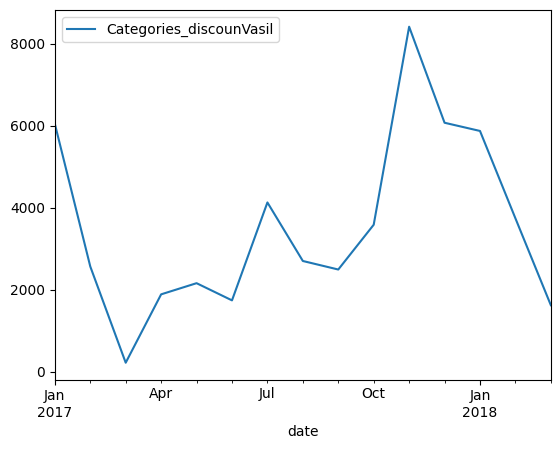

In [15]:
orderline_products.resample('M', on='date')[["Categories_discounVasil"]].count().plot()

## Data in term on time

In [16]:
orderline_products["date"].min(), orderline_products["date"].max()
orderline_products["date"].describe()


count                         53231
mean     2017-09-10 17:12:34.585824
min             2017-01-01 01:46:16
25%             2017-06-07 10:12:16
50%             2017-10-25 17:17:11
75%      2017-12-23 18:17:01.500000
max             2018-03-14 11:58:13
Name: date, dtype: object

Period of time of the data base Timestamp('2017-01-01 01:46:16'), Timestamp('2018-03-14 11:58:13'))

Discounts are defined as the difference between orderlines.unit_price and products.price. Merging both tables and creating a column that contains the discount is, thus, probably a good idea. Drop the columns that you don’t need so that they don’t confuse you.

##unit_price = unitary price at the moment of placing the order
##price= base price of the product

## Create second column with the total paid x cuantity in the order, then sum the orders and see first if the orders are increasing and in the money paid is increasing

In [17]:
# add second column with the total paid x cuantity in the order, then sum the orders and see first if the orders are increasing and in the money paid is increasing
orderline_products["reveneu"] = orderline_products["unit_price"] * orderline_products["product_quantity"]
orderline_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       53231 non-null  int64         
 1   id_order                 53231 non-null  int64         
 2   product_quantity         53231 non-null  float64       
 3   sku                      53231 non-null  object        
 4   unit_price               53231 non-null  float64       
 5   date                     53231 non-null  datetime64[ns]
 6   year                     53231 non-null  int32         
 7   month                    53231 non-null  int32         
 8   day                      53231 non-null  int32         
 9   day_of_week              53231 non-null  object        
 10  name                     53231 non-null  object        
 11  desc                     53231 non-null  object        
 12  price                    53231 n

## Total revenue

In [18]:
orderline_products.groupby([orderline_products["date"].dt.year, orderline_products["date"].dt.month])["reveneu"].sum().max()


1502265.95

##Nuria % of the revenue, related to the sum of the unit_price and related to discount and date, to be done

## Deleted columns

In [19]:
orderline_products = orderline_products.drop(columns=['day', 'in_stock'])

## Graph order in time

<Axes: xlabel='created_date'>

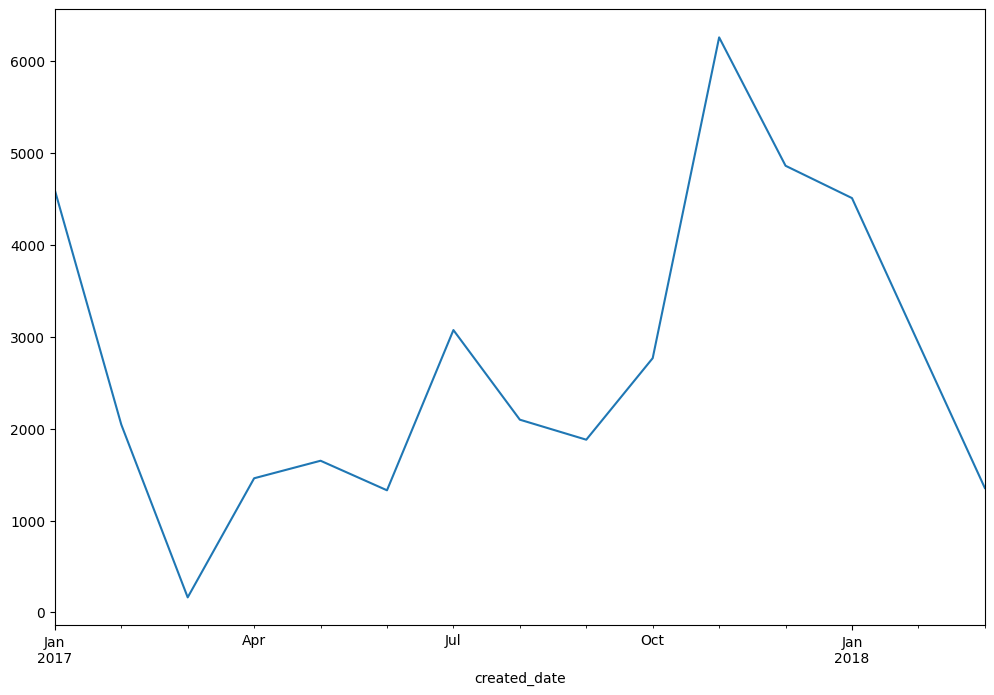

In [20]:
(
    orders_qu
    .resample("M", on="created_date")["order_id"]
    .count()
    .plot(figsize=(12, 8))
)

Seaborn Graf

In [21]:
totalrevenue2= orderline_products.groupby(['id_order', 'date']).agg({
    'reveneu': 'sum',
    'discount_percentage': 'mean',
    'product_quantity': 'sum',
    'Categories_discounVasil': "first"}).reset_index()
totalrevenue2

,id_order,date,reveneu,discount_percentage,product_quantity,Categories_discounVasil
0,241423,2017-11-06 12:47:20,129.16,7.74,1.00,Low_Discount
1,242832,2017-12-31 17:26:40,10.77,40.13,1.00,High_Discount
2,243330,2017-02-15 17:07:44,77.99,22.00,1.00,Medium_Discount
3,245275,2017-06-28 11:12:30,149.00,16.76,1.00,Medium_Discount
4,245595,2017-01-21 12:49:00,105.98,49.02,2.00,High_Discount
...,...,...,...,...,...,...
52955,527042,2018-03-14 11:42:38,13.99,60.03,1.00,High_Discount
52956,527070,2018-03-14 11:49:01,19.98,60.04,2.00,High_Discount
52957,527074,2018-03-14 11:49:36,19.98,60.04,2.00,High_Discount
52958,527096,2018-03-14 11:54:35,29.97,60.04,3.00,High_Discount


1502265.95 sum of the total money made by having discount

In [22]:
orderline_products.groupby([orderline_products["date"].dt.year, orderline_products["date"].dt.month,orderline_products["id_order"]])["reveneu"].sum().max()
orderline_products.groupby([orderline_products["date"].dt.year, orderline_products["date"].dt.month,orderline_products["id_order"]])["reveneu"].mean().round(2)

date  date  id_order
2017  1     245595     105.98
            254301      28.92
            254816      92.28
            260615     218.17
            261978     109.99
                        ...  
2018  3     527042      13.99
            527070      19.98
            527074      19.98
            527096      29.97
            527112       9.99
Name: reveneu, Length: 41076, dtype: float64

sum of the total price gruped by orders and year

In [23]:
(
    orderline_products
    .groupby([orderline_products["date"].dt.year,
              orderline_products["date"].dt.month,
              orderline_products["id_order"]])["product_quantity"]
    .sum()
 )

date  date  id_order
2017  1     245595     2.00
            254301     1.00
            254816     3.00
            260615     1.00
            261978     1.00
                       ... 
2018  3     527042     1.00
            527070     2.00
            527074     2.00
            527096     3.00
            527112     1.00
Name: product_quantity, Length: 41076, dtype: float64

############by products

In [24]:
orderline_products.groupby("sku")["reveneu"].sum()

sku
8MO0001-A    12.96
8MO0003-A    12.85
8MO0007     155.93
8MO0008     235.89
8MO0009      87.37
             ...  
ZAG0040      26.99
ZAG0041      19.99
ZAG0042      19.99
ZEP0007     125.99
par0072     618.98
Name: reveneu, Length: 5098, dtype: float64

date_filtering_df.loc[date_filtering_df["created_date"].between("2018-03-01", "2018-04-01")].head()

In [26]:
date_filtering_orderline_products = orderline_products.copy()


In [27]:
date_filtering_orderline_products.loc[date_filtering_orderline_products["date"].between("2017-10-01", "2018-01-01")].head(2)

,id,id_order,product_quantity,sku,unit_price,date,year,month,day_of_week,name,desc,price,type,discount,discount_percentage,Categories_discounVasil,reveneu
23934,1366383,406811,1.00,PUR0157,11.99,2017-10-01 00:01:27,2017,10,Sunday,Pure Nude iPhone Case X 03mm Transparent,Ultra-thin protection for your iPhone X,12.95,11865403,0.96,7.41,Low_Discount,11.99
23935,1366386,406813,1.00,OTR0045,29.99,2017-10-01 00:11:38,2017,10,Sunday,External Slim Case for SuperDrive MacBook / Ma...,External SuperDrive case for MacBook and MacBo...,35.00,12995397,5.01,14.31,Medium_Discount,29.99


# Filtering for Xmas

In [28]:
betweenCristmas=date_filtering_orderline_products.loc[date_filtering_orderline_products["date"].between("2017-10-01", "2018-01-01")]
betweenCristmas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18065 entries, 23934 to 41998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       18065 non-null  int64         
 1   id_order                 18065 non-null  int64         
 2   product_quantity         18065 non-null  float64       
 3   sku                      18065 non-null  object        
 4   unit_price               18065 non-null  float64       
 5   date                     18065 non-null  datetime64[ns]
 6   year                     18065 non-null  int32         
 7   month                    18065 non-null  int32         
 8   day_of_week              18065 non-null  object        
 9   name                     18065 non-null  object        
 10  desc                     18065 non-null  object        
 11  price                    18065 non-null  float64       
 12  type                     18064 no

<Axes: xlabel='date'>

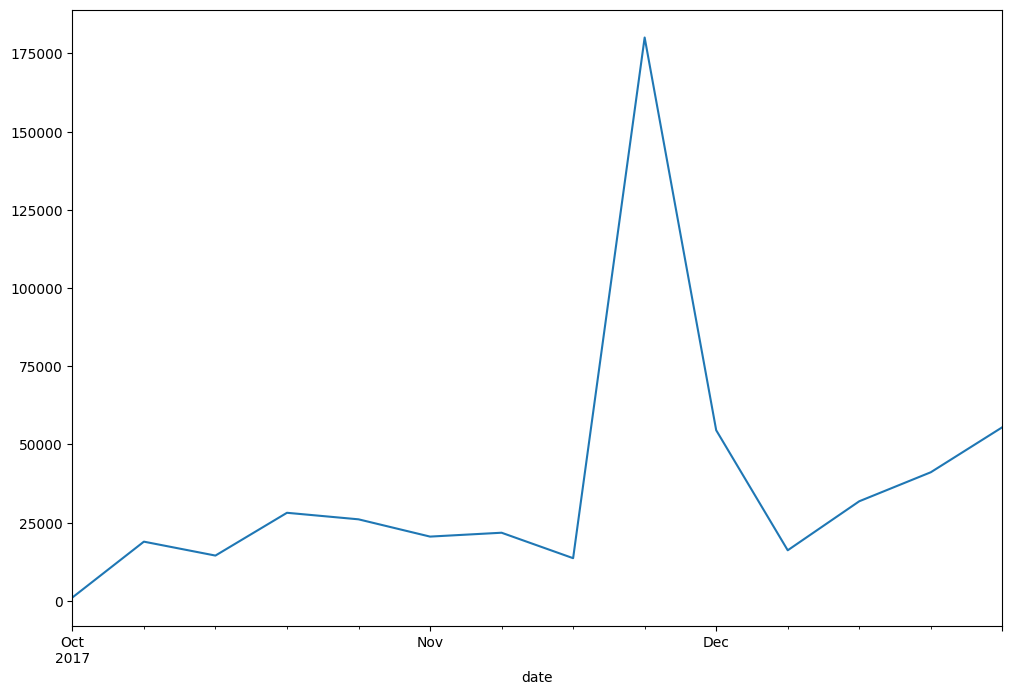

In [29]:
(
    betweenCristmas
    .resample("W", on="date")["discount"]
    .sum()
    .plot(figsize=(12, 8))
)

In [30]:
#Are some products that have more discount in Xristmas? curve with the x= percentatge_intotalrevenue and y=discount_percentage
df_1sku=betweenCristmas.groupby(['sku'])['discount_percentage'].mean()
top_skus = df_1sku.nlargest(5)
top_skus

sku
AP20124   85.86
GRT0465   85.67
GRT0464   85.53
GRT0466   85.22
GRT0462   84.70
Name: discount_percentage, dtype: float64

##Find products: most sold on Xmas

<Axes: xlabel='product_quantity', ylabel='discount_percentage'>

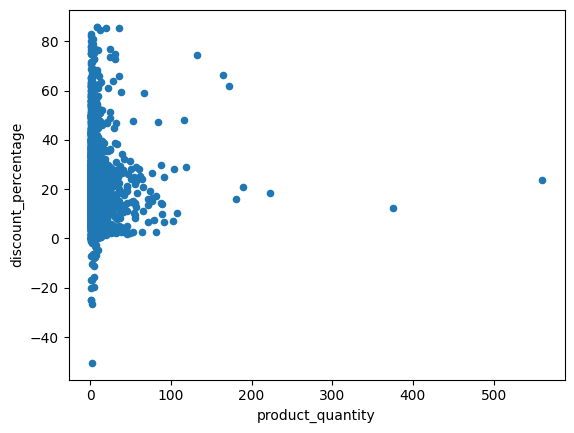

In [31]:
# find products: most sold on Xmas, highest revenue -> highest average discount_price
sku_analysis_cristmas_df = betweenCristmas.groupby('sku').agg({'product_quantity': 'sum', 'reveneu': 'mean', 'discount_percentage':'mean'}).sort_values('product_quantity', ascending=False)
sku_analysis_cristmas_df
sku_analysis_cristmas_df.plot.scatter(x='product_quantity', y='discount_percentage')

<Axes: xlabel='sku'>

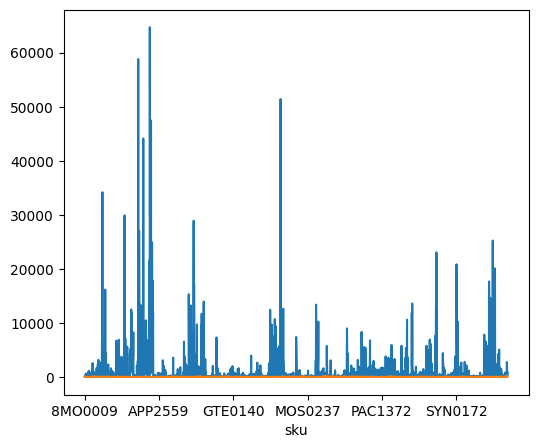

In [32]:
#most products discounted in xmas
betweenCristmas.groupby("sku")["reveneu"].sum()
betweenCristmas.groupby("sku")["reveneu"].sum().plot(figsize=(6, 5))
betweenCristmas.groupby("sku")["discount_percentage"].mean()
betweenCristmas.groupby("sku")["discount_percentage"].mean().plot(figsize=(6, 5))

## Create a new column with the first three letters of 'sku'

In [33]:
# Step 1: Create a new column with the first three letters of 'sku'
betweenCristmas['sku_prefix'] = betweenCristmas['sku'].str.slice(0, 3)
# Display the updated DataFrame to check the new column
betweenCristmas.head(2)


<ipython-input-33-5b876d366445>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betweenCristmas['sku_prefix'] = betweenCristmas['sku'].str.slice(0, 3)


,id,id_order,product_quantity,sku,unit_price,date,year,month,day_of_week,name,desc,price,type,discount,discount_percentage,Categories_discounVasil,reveneu,sku_prefix
23934,1366383,406811,1.00,PUR0157,11.99,2017-10-01 00:01:27,2017,10,Sunday,Pure Nude iPhone Case X 03mm Transparent,Ultra-thin protection for your iPhone X,12.95,11865403,0.96,7.41,Low_Discount,11.99,PUR
23935,1366386,406813,1.00,OTR0045,29.99,2017-10-01 00:11:38,2017,10,Sunday,External Slim Case for SuperDrive MacBook / Ma...,External SuperDrive case for MacBook and MacBo...,35.00,12995397,5.01,14.31,Medium_Discount,29.99,OTR


##Filtering for Summer

In [34]:
betweenSummer=orderline_products.loc[orderline_products["date"].between("2017-06-01", "2017-09-01")]
betweenSummer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8567 entries, 12875 to 21441
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       8567 non-null   int64         
 1   id_order                 8567 non-null   int64         
 2   product_quantity         8567 non-null   float64       
 3   sku                      8567 non-null   object        
 4   unit_price               8567 non-null   float64       
 5   date                     8567 non-null   datetime64[ns]
 6   year                     8567 non-null   int32         
 7   month                    8567 non-null   int32         
 8   day_of_week              8567 non-null   object        
 9   name                     8567 non-null   object        
 10  desc                     8567 non-null   object        
 11  price                    8567 non-null   float64       
 12  type                     8565 non-

## Graph Summer Prodct quantity

<Axes: xlabel='date'>

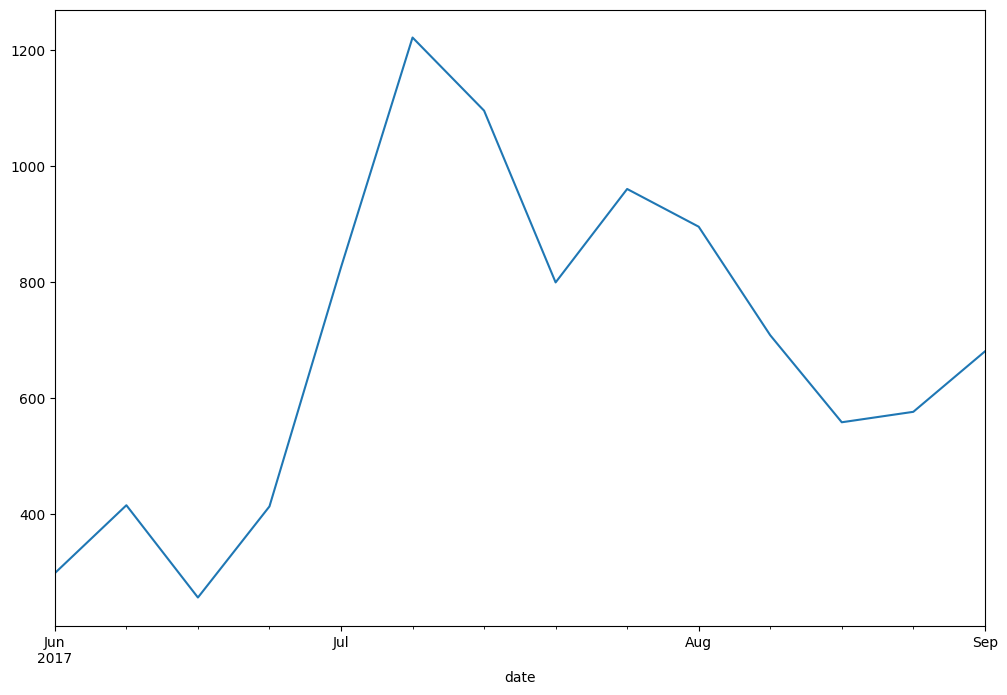

In [35]:
(
    betweenSummer
    .resample("W", on="date")["product_quantity"]
    .sum()
    .plot(figsize=(12, 8))
)

,product_quantity,reveneu,discount_percentage
count,6509.00,6509.00,6509.00
mean,1.49,161.96,21.50
std,1.23,211.43,17.92
min,1.00,2.84,-212.27
25%,1.00,34.99,10.00
50%,1.00,79.99,17.42
75%,2.00,203.50,28.75
max,27.00,5799.80,90.82


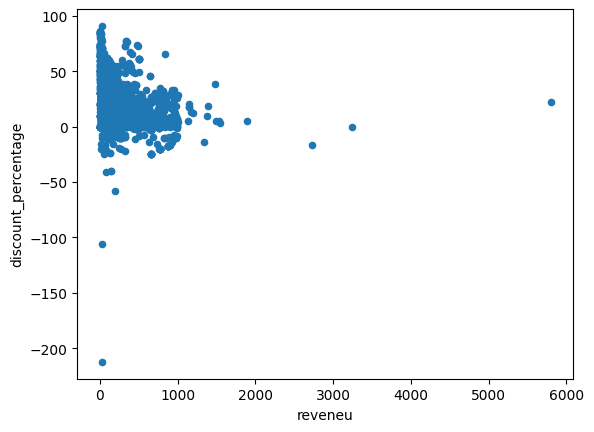

In [36]:
# find goruped_order: most sold, highest revenue -> highest average discount_price
sku_analysis_summer_id_orde_df = betweenSummer.groupby('id_order').agg({'product_quantity': 'sum', 'reveneu': 'mean', 'discount_percentage':'mean'}).sort_values('product_quantity', ascending=False)
sku_analysis_summer_id_orde_df
sku_analysis_summer_id_orde_df.plot.scatter(x='reveneu', y='discount_percentage')
sku_analysis_summer_id_orde_df.describe()

## Import orderline_products

In [ ]:
# from google.colab import files

# orderline_products.to_csv("orderline_productsNAS_cl.csv", index=False)
# files.download("orderline_productsNAS_cl.csv")

##Prefix Sku

In [39]:
# Step In orderline products: Create a new column with the first three letters of 'sku'
orderline_products['sku_prefix'] = orderline_products['sku'].str.slice(0, 3)



In [40]:
# Step  In betwen xmas : Create a new column with the first three letters of 'sku'
betweenCristmas['sku_prefix'] = betweenCristmas['sku'].str.slice(0, 3)
# Display the updated DataFrame to check the new column
betweenCristmas
betweenCristmas.columns

<ipython-input-40-ed6884c0f0cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betweenCristmas['sku_prefix'] = betweenCristmas['sku'].str.slice(0, 3)


Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix'],
      dtype='object')

In [41]:
# Step  In betwen summer : Create a new column with the first three letters of 'sku'
betweenSummer['sku_prefix'] = betweenSummer['sku'].str.slice(0, 3)
# Display the updated DataFrame to check the new column
betweenSummer
betweenSummer.columns

<ipython-input-41-82408df89174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betweenSummer['sku_prefix'] = betweenSummer['sku'].str.slice(0, 3)


Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix'],
      dtype='object')

-----------------------------------------------------------------------------------------------

##  Category creation by search term
Let's start by creating a column `category`. For now we'll fill this column with a blank string `""`.

In [42]:
orderline_products.groupby("type").size().nlargest(10)
orderline_products.loc[orderline_products["type"] == "11865403"].sample(5)


,id,id_order,product_quantity,sku,unit_price,date,year,month,day_of_week,name,desc,price,type,discount,discount_percentage,Categories_discounVasil,reveneu,sku_prefix
43405,1542868,484005,1.00,MOS0241,32.99,2018-01-06 22:53:50,2018,1,Saturday,Moshi iPhone Case StealthCover X Rosa Champagne,360-degree protection of military grade that r...,40.00,11865403,7.01,17.52,Medium_Discount,32.99,MOS
52906,1646205,525480,1.00,GRT0448,12.99,2018-03-11 16:27:28,2018,3,Sunday,Griffin Survivor iPhone Case Journey 8 Plus / ...,rugged case with shock dispersion system for i...,29.99,11865403,17.00,56.69,High_Discount,12.99,GRT
8385,1186898,326998,1.00,OTT0140,22.99,2017-02-21 07:25:05,2017,2,Tuesday,OtterBox Symmetry Clear Case iPhone SE / 5s / ...,resistant cover and rear transparent thin iPho...,29.99,11865403,7.00,23.34,Medium_Discount,22.99,OTT
43389,1542712,483940,1.00,OTT0133,19.99,2018-01-06 20:44:32,2018,1,Saturday,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,11865403,15.00,42.87,High_Discount,19.99,OTT
9212,1228160,346225,1.00,APP1672,40.99,2017-04-14 22:04:02,2017,4,Friday,Silicone Case Cover Apple iPhone 7 Plus Blue Sea,Ultrathin silicone case and microfiber premium...,45.00,11865403,4.01,8.91,Low_Discount,40.99,APP


Make copies of the tables

In [43]:
orderline_products_category = orderline_products.copy()
betweenSummer_category =betweenSummer.copy()
betweenCristmas_category=betweenCristmas.copy()

## Product Categories for total table

In [44]:
orderline_products_category["Product_category"] = ""
orderline_products_category.columns

Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix', 'Product_category'],
      dtype='object')

In [45]:
# orderline_products.loc[(orderline_products["type"]=="5398"),"category"] = ", speaker"
# orderline_products.loc[(orderline_products["type"]=="13005399"),"category"] = ", charger"
orderline_products.loc[(orderline_products["type"]=="12175397"),"category"] = ", server"

In [46]:
orderline_products_category.loc[orderline_products_category["desc"].str.contains("keyboard|keypad", case=False), "Product_category"] += ", keyboard"
orderline_products_category.loc[orderline_products_category["name"].str.contains("iphone", case=False) & (orderline_products_category["sku"].str.contains("app", case=False)), "Product_category"] += ", iphone"
orderline_products_category.loc[orderline_products_category["name"].str.contains("ipod|watch", case=False) & (orderline_products_category["sku"].str.contains("app", case=False)) &(orderline_products_category["Product_category"] != "iphone"), "Product_category"] += ", ipod/iwatch"
orderline_products_category.loc[orderline_products_category["name"].str.contains("ipad|tablet", case=False) & (orderline_products_category["sku"].str.contains("app", case=False)) &  (orderline_products_category["Product_category"] != "iphone | ipod/iwatch"), "Product_category"] += ", tablet"
#orderline_products_category.loc[orderline_products_category["name"].str.contains("imac|mac mini|mac pro | macbook", case=False) & (orderline_products_category["product_price"] > 200) & (product_category_df["sku"].str.contains("app", case=False)), "category"] = ", mac"
orderline_products_category.loc[(orderline_products_category["desc"].str.contains("apple", case=False)) & (~orderline_products_category["sku"].str.contains("app", case=False)), "Product_category"] += ", apple_generica"
orderline_products_category.loc[(orderline_products_category["name"].str.contains("case|cover", case=False)) & (~orderline_products_category["sku"].str.contains("app", case=False)), "Product_category"] += ", cases"
orderline_products_category.loc[orderline_products_category["name"].str.contains("drive|disk|hdd|ssd|memory|thunderbolt", case=False), "Product_category"] += ", memory"
orderline_products_category.loc[orderline_products_category["name"].str.contains("monitor|hdmi", case=False), "Product_category"] += ", monitor"

orderline_products_category.loc[orderline_products_category["name"].str.contains("camera|gopro", case=False), "Product_category"] += ", camera"

# orderline_products.loc[(orderline_products["type"]=="5398"),"Product_category"] += ", speaker"
# orderline_products.loc[(orderline_products["type"]=="13005399"),"Product_category"] += ", charger"
# orderline_products.loc[(orderline_products["type"]=="12175397"),"Product_category"] += ", server"


# orderline_products_category.loc[orderline_products_category["type"].str.contains("5398"), "category"] = ", speaker"
#orderline_products_category.loc[orderline_products_category["type"].str.contains("13005399"), "category"] = ", charger"
#orderline_products_category.loc[orderline_products_category["type"].str.contains("12175397"), "category"] = ", server"
#orderline_products_category.loc[orderline_products_category["type"].str.contains("11935397"), "category"] += ", memory"

orderline_products_category.loc[orderline_products_category["name"].str.contains("robot|segway|scooter", case=False), "Product_category"] = ", segway"

#orderline_products_category.loc[orderline_products_category["type"].str.isnull() & (orderline_products_category["sku"].str.contains("app", case=False)), "category"] += ", apple_divers"
orderline_products_category.loc[(orderline_products_category["Product_category"] == "") & (orderline_products_category["sku"].str.contains("app", case=False)), "Product_category"] += "apple_divers"
orderline_products_category.loc[(orderline_products_category["desc"].str.contains("apple", case=False)) & (~orderline_products_category["sku"].str.contains("app", case=False)), "Product_category"] += ", generica"
orderline_products_category.loc[orderline_products_category["Product_category"] == "", "Product_category"] += ", other"

orderline_products_category['Product_category'] = orderline_products_category['Product_category'].str.replace(r'^, ', '', regex=True)

In [47]:
orderline_products_category["Product_category"].value_counts()

Product_category
other                                        17921
memory                                       14274
cases                                         4946
iphone                                        3465
apple_divers                                  2702
monitor                                       2639
apple_generica, generica                      2122
keyboard                                      1277
tablet                                         878
iphone, ipod/iwatch, tablet                    686
ipod/iwatch                                    631
segway                                         328
keyboard, cases                                270
camera                                         207
cases, memory                                  167
apple_generica, cases, generica                166
apple_generica, memory, generica               119
iphone, ipod/iwatch                            112
monitor, camera                                 77
memory, monito

## Categories Product for Xmas

In [48]:
betweenCristmas_category["Product_category"] = ""
betweenCristmas_category.columns

Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix', 'Product_category'],
      dtype='object')

In [49]:
betweenCristmas_category.loc[betweenCristmas_category["desc"].str.contains("keyboard|keypad", case=False), "Product_category"] += ", keyboard"
betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("iphone", case=False) & (betweenCristmas_category["sku"].str.contains("app", case=False)), "Product_category"] += ", iphone"
betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("ipod|watch", case=False) & (betweenCristmas_category["sku"].str.contains("app", case=False)) &(betweenCristmas_category["Product_category"] != "iphone"), "Product_category"] += ", ipod/iwatch"
betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("ipad|tablet", case=False) & (betweenCristmas_category["sku"].str.contains("app", case=False)) &  (betweenCristmas_category["Product_category"] != "iphone | ipod/iwatch"), "Product_category"] += ", tablet"
#betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("imac|mac mini|mac pro | macbook", case=False) & (betweenCristmas_category["product_price"] > 200) & (betweenCristmas_category["sku"].str.contains("app", case=False)), "category"] = ", mac"
betweenCristmas_category.loc[(betweenCristmas_category["desc"].str.contains("apple", case=False)) & (~betweenCristmas_category["sku"].str.contains("app", case=False)), "Product_category"] += ", apple_generica"
betweenCristmas_category.loc[(betweenCristmas_category["name"].str.contains("case|cover", case=False)) & (~betweenCristmas_category["sku"].str.contains("app", case=False)), "Product_category"] += ", cases"
betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("drive|disk|hdd|ssd|memory|thunderbolt", case=False), "Product_category"] += ", memory"
betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("monitor|hdmi", case=False), "Product_category"] += ", monitor"

betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("camera|gopro", case=False), "Product_category"] += ", camera"

betweenCristmas_category.loc[(betweenCristmas_category["type"]=="5398"),"Product_category"] += ", speaker"
betweenCristmas_category.loc[(betweenCristmas_category["type"]=="13005399"),"Product_category"] += ", charger"
betweenCristmas_category.loc[(betweenCristmas_category["type"]=="12175397"),"Product_category"] += ", server"

# betweenCristmas_category.loc[betweenCristmas_category["type"].str.contains("5398"), "category"] = ", speaker"
# betweenCristmas_category.loc[betweenCristmas_category["type"].str.contains("13005399"), "category"] = ", charger"
# betweenCristmas_category.loc[betweenCristmas_category["type"].str.contains("12175397"), "category"] = ", server"
# betweenCristmas_category.loc[betweenCristmas_category["type"].str.contains("11935397"), "category"] += ", memory"

betweenCristmas_category.loc[betweenCristmas_category["name"].str.contains("robot|segway|scooter", case=False), "Product_category"] += ", segway"

#betweenCristmas_category.loc[betweenCristmas_category["type"].str.isnull() & (betweenCristmas_category["sku"].str.contains("app", case=False)), "category"] += ", apple_divers"
betweenCristmas_category.loc[(betweenCristmas_category["Product_category"] == "") & (betweenCristmas_category["sku"].str.contains("app", case=False)), "Product_category"] += "apple_divers"
betweenCristmas_category.loc[(betweenCristmas_category["desc"].str.contains("apple", case=False)) & (~betweenCristmas_category["sku"].str.contains("app", case=False)), "Product_category"] += ", generica"
betweenCristmas_category.loc[betweenCristmas_category["Product_category"] == "", "Product_category"] += ", other"

betweenCristmas_category['Product_category'] = betweenCristmas_category['Product_category'].str.replace(r'^, ', '', regex=True)

In [50]:
betweenCristmas_category["Product_category"].value_counts()

Product_category
other                                        5306
memory                                       4262
cases                                        1682
iphone                                       1572
monitor                                       800
apple_generica, generica                      648
apple_divers                                  633
server                                        468
iphone, ipod/iwatch, tablet                   394
keyboard                                      374
speaker                                       351
ipod/iwatch                                   345
tablet                                        339
segway                                        230
keyboard, cases                               151
charger                                       145
camera                                         78
cases, memory                                  47
apple_generica, cases, generica                46
apple_generica, memory, generica 

## Categories Product for Summer

In [51]:
betweenSummer_category["Product_category"] = ""
betweenSummer_category.columns

Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix', 'Product_category'],
      dtype='object')

In [52]:
betweenSummer_category.loc[betweenSummer_category["desc"].str.contains("keyboard|keypad", case=False), "Product_category"] += ", keyboard"
betweenSummer_category.loc[betweenSummer_category["name"].str.contains("iphone", case=False) & (betweenSummer_category["sku"].str.contains("app", case=False)), "Product_category"] += ", iphone"
betweenSummer_category.loc[betweenSummer_category["name"].str.contains("ipod|watch", case=False) & (betweenSummer_category["sku"].str.contains("app", case=False)) &(betweenSummer_category["Product_category"] != "iphone"), "Product_category"] += ", ipod/iwatch"
betweenSummer_category.loc[betweenSummer_category["name"].str.contains("ipad|tablet", case=False) & (betweenSummer_category["sku"].str.contains("app", case=False)) &  (betweenSummer_category["Product_category"] != "iphone | ipod/iwatch"), "Product_category"] += ", tablet"
#betweenSummer_category.loc[betweenSummer_category["name"].str.contains("imac|mac mini|mac pro | macbook", case=False) & (betweenSummer_category["product_price"] > 200) & (betweenSummer_category["sku"].str.contains("app", case=False)), "category"] = ", mac"
betweenSummer_category.loc[(betweenSummer_category["desc"].str.contains("apple", case=False)) & (~betweenSummer_category["sku"].str.contains("app", case=False)), "Product_category"] += ", apple_generica"
betweenSummer_category.loc[(betweenSummer_category["name"].str.contains("case|cover", case=False)) & (~betweenSummer_category["sku"].str.contains("app", case=False)), "Product_category"] += ", cases"
betweenSummer_category.loc[betweenSummer_category["name"].str.contains("drive|disk|hdd|ssd|memory|thunderbolt", case=False), "Product_category"] += ", memory"
betweenSummer_category.loc[betweenSummer_category["name"].str.contains("monitor|hdmi", case=False), "Product_category"] += ", monitor"

betweenSummer_category.loc[betweenSummer_category["name"].str.contains("camera|gopro", case=False), "Product_category"] += ", camera"

betweenSummer_category.loc[(betweenSummer_category["type"]=="5398"),"Product_category"] += ", speaker"
betweenSummer_category.loc[(betweenSummer_category["type"]=="13005399"),"Product_category"] += ", charger"
betweenSummer_category.loc[(betweenSummer_category["type"]=="12175397"),"Product_category"] += ", server"

#betweenSummer_category.loc[betweenSummer_category["type"].str.contains("5398"), "category"] = ", speaker"
#betweenSummer_category.loc[betweenSummer_category["type"].str.contains("13005399"), "category"] = ", charger"
#betweenSummer_category.loc[betweenSummer_category["type"].str.contains("12175397"), "category"] = ", server"
#betweenSummer_category.loc[betweenSummer_category["type"].str.contains("11935397"), "category"] += ", memory"

betweenSummer_category.loc[betweenSummer_category["name"].str.contains("robot|segway|scooter", case=False), "Product_category"] += ", segway"

#betweenSummer_category.loc[betweenSummer_category["type"].str.isnull() & (betweenSummer_category["sku"].str.contains("app", case=False)), "category"] += ", apple_divers"
betweenSummer_category.loc[(betweenSummer_category["Product_category"] == "") & (betweenSummer_category["sku"].str.contains("app", case=False)), "Product_category"] = "apple_divers"
betweenSummer_category.loc[(betweenSummer_category["desc"].str.contains("apple", case=False)) & (~betweenSummer_category["sku"].str.contains("app", case=False)), "Product_category"] += ", generica"
betweenSummer_category.loc[betweenSummer_category["Product_category"] == "", "Product_category"] += ", other"

betweenSummer_category['Product_category'] = betweenSummer_category['Product_category'].str.replace(r'^, ', '', regex=True)

In [53]:
betweenSummer_category["Product_category"].value_counts()

Product_category
other                                        2404
memory                                       2383
cases                                         920
iphone                                        712
apple_generica, generica                      405
apple_divers                                  365
monitor                                       351
tablet                                        176
charger                                       151
keyboard                                      141
server                                        119
speaker                                       111
ipod/iwatch                                    63
iphone, ipod/iwatch, tablet                    60
cases, memory                                  33
apple_generica, cases, generica                30
monitor, camera                                29
iphone, ipod/iwatch                            21
camera                                         19
keyboard, tablet                 

Nuria delete rows with NaN in discount_category, 	discount_percentage negative ( ex PUR0155)

In [54]:
betweenSummer_category.columns

Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix', 'Product_category'],
      dtype='object')

## Import  orderline_products.to_csv

In [ ]:
# from google.colab import files

# orderline_products.to_csv("orderline_productsXstmas_cl.csv", index=False)
# files.download("orderline_productsXstmas_cl.csv")

In [55]:
product_cat=(

betweenSummer_category.groupby('Product_category')
.agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum'})
.sort_values('product_quantity', ascending=False)

)

In [56]:
product_cat

,sku,product_quantity,unit_price,discount_percentage,reveneu
Product_category,,,,,
memory,2383,2897.00,151.03,17.12,412120.39
other,2404,2619.00,67.27,24.73,170933.51
cases,920,1004.00,28.53,36.66,29650.34
iphone,712,726.00,346.06,10.45,252104.41
apple_divers,365,477.00,59.31,30.01,23865.28
"apple_generica, generica",405,439.00,111.94,29.14,46941.63
monitor,351,424.00,238.97,17.25,96600.34
keyboard,141,193.00,71.31,15.39,14668.92
tablet,176,181.00,433.89,7.61,78283.00


In [ ]:
# from google.colab import files

# orderline_products.to_csv("orderline_productsXstmas_cl.csv", index=False)
# files.download("orderline_productsXstmas_cl.csv")

### Import Brand table

In [57]:
# Brand.csv
url = "https://drive.google.com/file/d/1XZY6VypcEfseQ5zt1LVFEZDU-ohSWXuZ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
Brand = pd.read_csv(path)

In [58]:
Brand.rename(columns={'short': 'sku_prefix'})


,sku_prefix,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
5,ALL,Allocacoc
6,AP2,Apple
7,APP,Apple
8,BAN,Band&Strap
9,BEA,Beats


## Merge tables to brand table to have the brand

In [59]:
orderline_products_category.columns
# betweenSummer_category
# betweenCristmas_category


Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix', 'Product_category'],
      dtype='object')

In [60]:
total_df=orderline_products_category.merge(Brand, left_on= 'sku_prefix', right_on='short' ,how='left')


In [61]:
summer_df=betweenSummer_category.merge(Brand, left_on= 'sku_prefix', right_on='short' ,how='left')


In [62]:
Xmas_df=betweenCristmas_category.merge(Brand, left_on= 'sku_prefix', right_on='short' ,how='left')


## Delete rows with negative discount percentages

In [63]:
# Step 1: Create a boolean Series to identify rows with negative discount percentages
deletenegativexmasvalues = Xmas_df['discount_percentage'] < 0
# Step 2: Filter the DataFrame using the boolean Series
betweenCristmas_category = Xmas_df.loc[~deletenegativexmasvalues, :]


In [64]:
# Step 1: Create a boolean Series to identify rows with revenue outlier
deletenegativexmasvaluesreveneu = Xmas_df['reveneu'] > 6000
# Step 2: Filter the DataFrame using the boolean Series
Xmas_df = Xmas_df.loc[~deletenegativexmasvaluesreveneu, :]


##  Graph

<Axes: xlabel='reveneu', ylabel='discount_percentage'>

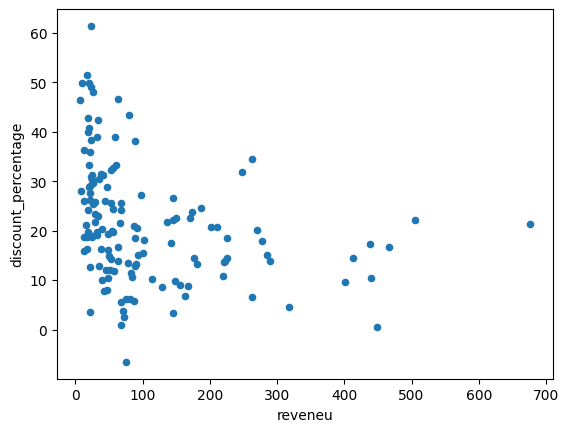

In [65]:
# find goruped_order: most sold, highest revenue -> highest average discount_price
betweenCristmas_category_group = Xmas_df.groupby('long').agg({'product_quantity': 'sum', 'reveneu': 'mean', 'discount_percentage':'mean'}).sort_values('product_quantity', ascending=False)
betweenCristmas_category_group
betweenCristmas_category_group.plot.scatter(x='reveneu', y='discount_percentage')

### Import final excels

In [ ]:
# from google.colab import files

# total_df.to_csv("total_df.csv", index=False)
# files.download("total_df.csv")

# summer_df.to_csv("summer_df.csv", index=False)
# files.download("summer_df.csv")

# Xmas_df.to_csv("Xmas_df.csv", index=False)
# files.download("Xmas_df.csv")

#Data Visualization with seaborn

In [ ]:
Xmas_df.columns

Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'year', 'month', 'day_of_week', 'name', 'desc', 'price', 'type',
       'discount', 'discount_percentage', 'Categories_discounVasil', 'reveneu',
       'sku_prefix', 'category', 'Product_category', 'short', 'long'],
      dtype='object')

## Seaborn--------------------------------------------------------------------------

In [66]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
# Xmas_df.info()
# total_df.info()
# summer_df.info()

In [67]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       53231 non-null  int64         
 1   id_order                 53231 non-null  int64         
 2   product_quantity         53231 non-null  float64       
 3   sku                      53231 non-null  object        
 4   unit_price               53231 non-null  float64       
 5   date                     53231 non-null  datetime64[ns]
 6   year                     53231 non-null  int32         
 7   month                    53231 non-null  int32         
 8   day_of_week              53231 non-null  object        
 9   name                     53231 non-null  object        
 10  desc                     53231 non-null  object        
 11  price                    53231 non-null  float64       
 12  type                     53220 n

##total_df----------------------------------------------------------------------------

In [68]:
total_df['Categories_discounVasil'].value_counts()

Categories_discounVasil
Medium_Discount    26616
High_Discount      12282
Low_Discount        9137
no_Discount         5196
Name: count, dtype: int64

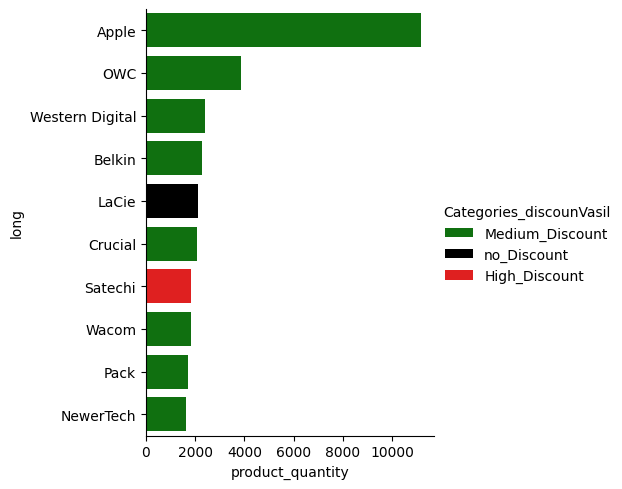

In [69]:
plot_company_long_quantity = (total_df
      .groupby([ "long"])
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'product_quantity' )
)
plot_company_long_quantity

plot_company_long_quantity

custom_palette = {
    'High_Discount': 'red',
    'Medium_Discount': 'green',
    'Low_Discount': 'blue',
    'no_Discount': 'black'
}

sns.catplot(x='product_quantity', y='long', data=plot_company_long_quantity, hue='Categories_discounVasil', kind="bar", palette=custom_palette)

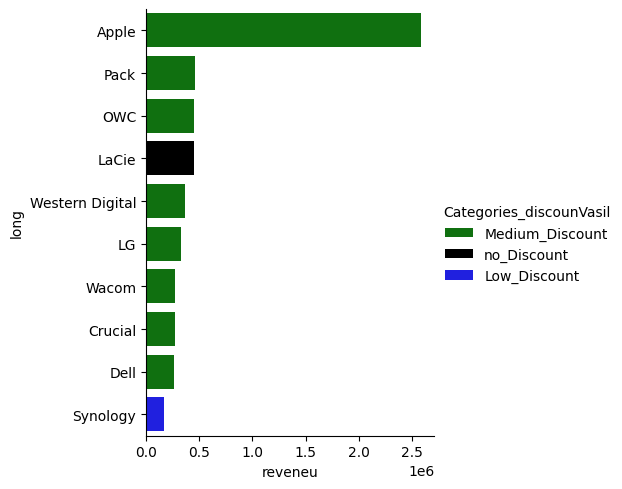

In [70]:
plot_company_long_reveneu = (total_df
      .groupby([ "long"])
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'reveneu' )
)
plot_company_long_reveneu

plot_company_long_reveneu

custom_palette = {
    'High_Discount': 'red',
    'Medium_Discount': 'green',
    'Low_Discount': 'blue',
    'no_Discount': 'black'
}
sns.catplot(x='reveneu', y='long', data=plot_company_long_reveneu, hue='Categories_discounVasil', kind="bar",palette=custom_palette )

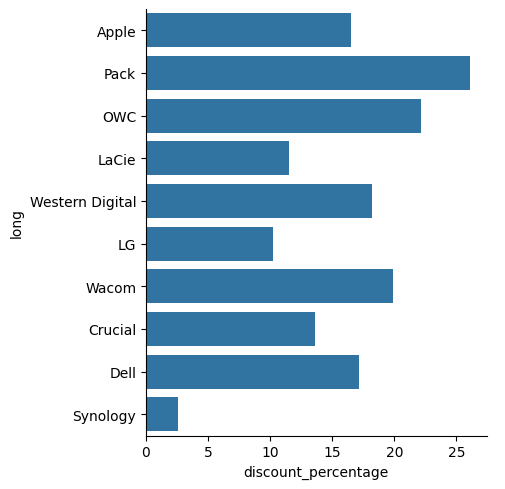

In [71]:
plot_company_long_reveneu = (total_df
      .groupby([ "long"])
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'reveneu' )
)
plot_company_long_reveneu

plot_company_long_reveneu

# custom_palette = {
#     'High_Discount': 'red',
#     'Medium_Discount': 'green',
#     'Low_Discount': 'blue',
#     'no_Discount': 'black'
# }
sns.catplot(x='discount_percentage', y='long', data=plot_company_long_reveneu, kind="bar")# hue='Categories_discounVasil', palette=custom_palette

In [72]:
category_counts = plot_company_long_quantity['Categories_discounVasil'].value_counts()
category_counts

Categories_discounVasil
Medium_Discount    8
no_Discount        1
High_Discount      1
Name: count, dtype: int64

## Graph with second axis

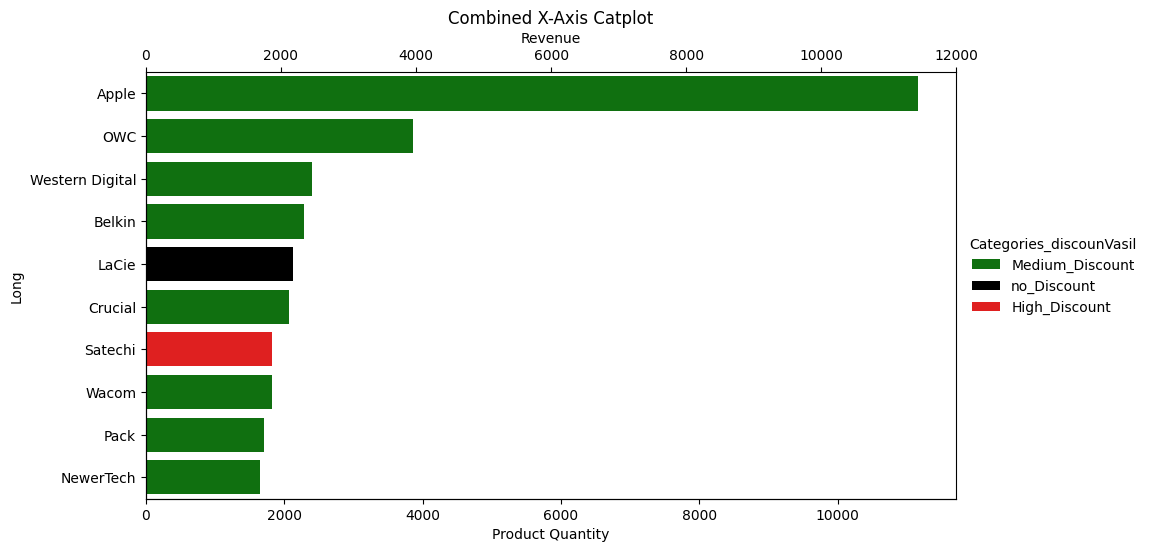

In [73]:
# Define a custom color palette
custom_palette = {
    'High_Discount': 'red',
    'Medium_Discount': 'green',
    'Low_Discount': 'blue',
    'no_Discount': 'black'
}


# Create the primary plot using catplot
g = sns.catplot(x='product_quantity', y='long', data=plot_company_long_quantity, kind='bar', color='blue', height=5, aspect=2, hue="Categories_discounVasil", palette=custom_palette)
g.set_axis_labels('Product Quantity', 'Long')

# Create a secondary axis using Matplotlib
ax1 = g.ax
ax2 = ax1.twiny()

# Map the secondary axis to the same range as the primary axis
ax2.set_xlim(ax1.get_xlim())

# Set the tick positions and labels for the secondary axis
secondary_ticks = plot_company_long_reveneu['reveneu'].unique()
ax2.set_xticks(ax1.get_xticks())
# ax2.set_xticklabels(secondary_ticks)

# Set the label for the secondary axis
ax2.set_xlabel('Revenue')

# Display the plot
plt.title('Combined X-Axis Catplot')
plt.show()


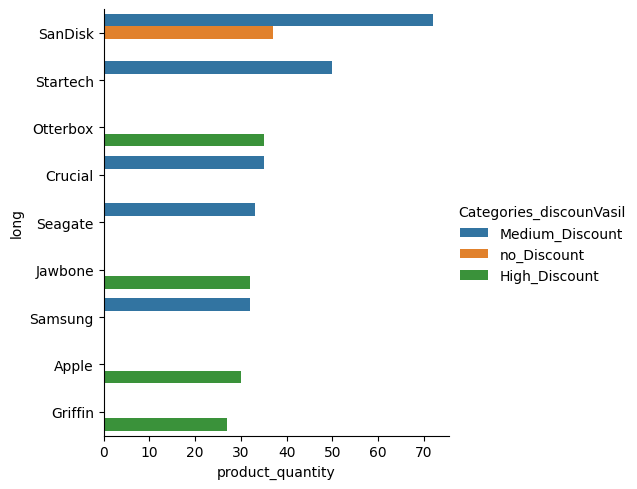

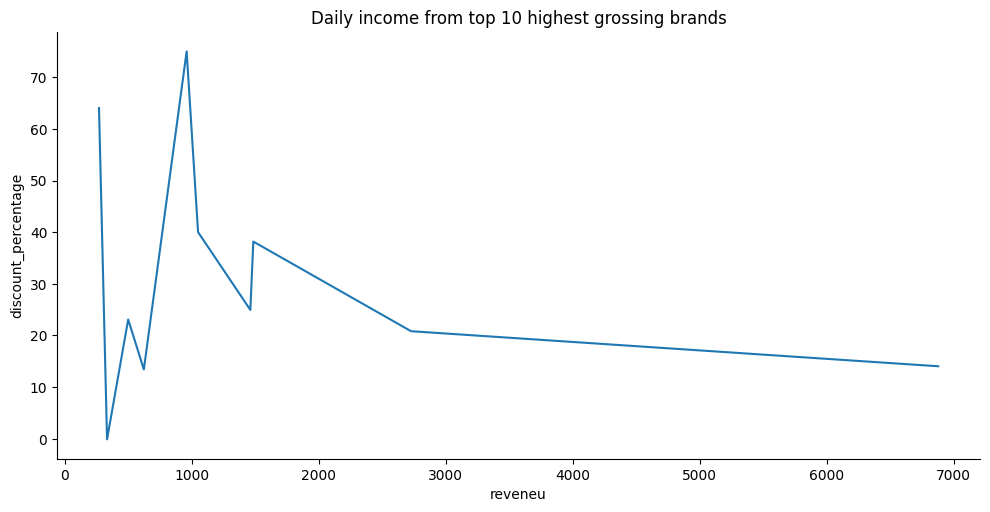

In [74]:
plot_company = (total_df
      .groupby(["date", "long"])
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'product_quantity' )
)
plot_company

plot_company

sns.catplot(x='product_quantity', y='long', data=plot_company, hue='Categories_discounVasil', kind="bar")

# # # #Plot Bar
# (
# sns.catplot(data=plot_company,
#                  x="product_quantity",
#                  y="long",
#                  #hue="Categories_discounVasil",
#                  kind="bar",
#                  height=8)
#     .set_axis_labels("Number of products sold",
#                      "Company")
#     .figure.suptitle("Top 10 Comnpanies Sold")
#     .figure.subplots_adjust(top=.92)
# );

# # # #Plot Line
# sns.set_theme(style="darkgrid")

(
sns.relplot(kind="line",
             data=plot_company,
             x="reveneu",
             y="discount_percentage",
             #hue="Categories_discounVasil",
             height=5,
             aspect=2)
    .set_axis_labels("reveneu",
                     "discount_percentage")
    .set(title="Daily income from top 10 highest grossing brands")
);

## By Company

In [ ]:
# plot_company.reset_index()

## By date

## group by Apple

In [76]:
# Step 1: Create a boolean Series to identify rows with negative discount percentages
deletenegativexmasvalues = Xmas_df['discount_percentage'] < 0
# Step 2: Filter the DataFrame using the boolean Series
Xmas_df = Xmas_df.loc[~deletenegativexmasvalues, :]
Xmas_df.sample(2)

,id,id_order,product_quantity,sku,unit_price,date,year,month,day_of_week,name,...,price,type,discount,discount_percentage,Categories_discounVasil,reveneu,sku_prefix,Product_category,short,long
9381,1445974,443035,1.00,QNA0150,324.57,2017-11-25 11:55:11,2017,11,Saturday,QNAP TS-251 + NAS | 2GB RAM Mac and PC,...,349.00,12175397,24.43,7.00,Low_Discount,324.57,QNA,server,QNA,QNAP
8962,1442613,441578,1.00,APP0698,8.99,2017-11-24 21:47:31,2017,11,Friday,Apple Lightning Cable Connector to USB 1m Whit...,...,25.00,1230,16.01,64.04,High_Discount,8.99,APP,apple_divers,APP,Apple


In [77]:
plot_Product_a = (total_df.groupby('long').agg({'product_quantity': 'sum', 'unit_price': 'mean','discount_percentage': 'mean','revenue': 'sum' }))


plot_Product_noapple = plot_Product_a.loc[~(plot_Product_a["long"] == "Apple"), :]
plot_Product_apple = plot_Product_a.loc[plot_Product_a["long"] == "Apple", :]



KeyError: "Column(s) ['revenue'] do not exist"

In [78]:
total_df_appel=total_df.loc[("total_df")]

KeyError: 'total_df'

In [79]:
plot_data = (total_df
      .resample('D', on='date')
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'product_quantity' )
)
plot_data

# # #Plot
# sns.set_theme(style="darkgrid")

# # (
# sns.relplot(kind="line",
#              data=plot_data,
#              x="date",
#              y="reveneu",
#              hue="Categories_discounVasil",
#              height=5,
#              aspect=2)
#     .set_axis_labels("Date",
#                      "Revenue generated")
#     .set(title="Daily income from top 10 highest grossing brands")
# );

,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
date,,,,,,
2017-11-24,1849,2158.00,182.53,22.64,363475.65,Medium_Discount
2017-11-27,1139,1256.00,162.06,24.23,198521.75,Medium_Discount
2017-11-23,932,1109.00,172.65,23.86,187254.65,Medium_Discount
2017-11-26,680,736.00,169.31,25.11,120417.04,Medium_Discount
2017-11-25,575,661.00,158.03,23.25,101120.49,Medium_Discount
2018-01-02,490,523.00,131.00,19.13,67775.29,Low_Discount
2017-12-28,400,446.00,154.85,20.41,66144.52,High_Discount
2017-01-02,377,440.00,95.80,17.31,38700.70,no_Discount
2017-11-22,361,437.00,171.55,21.36,71238.48,Medium_Discount


In [80]:
plot_data=plot_data.reset_index()
plot_data

,date,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
0,2017-11-24,1849,2158.00,182.53,22.64,363475.65,Medium_Discount
1,2017-11-27,1139,1256.00,162.06,24.23,198521.75,Medium_Discount
2,2017-11-23,932,1109.00,172.65,23.86,187254.65,Medium_Discount
3,2017-11-26,680,736.00,169.31,25.11,120417.04,Medium_Discount
4,2017-11-25,575,661.00,158.03,23.25,101120.49,Medium_Discount
5,2018-01-02,490,523.00,131.00,19.13,67775.29,Low_Discount
6,2017-12-28,400,446.00,154.85,20.41,66144.52,High_Discount
7,2017-01-02,377,440.00,95.80,17.31,38700.70,no_Discount
8,2017-11-22,361,437.00,171.55,21.36,71238.48,Medium_Discount
9,2017-12-18,373,405.00,148.29,16.16,57895.12,Low_Discount


## Graph with second axis

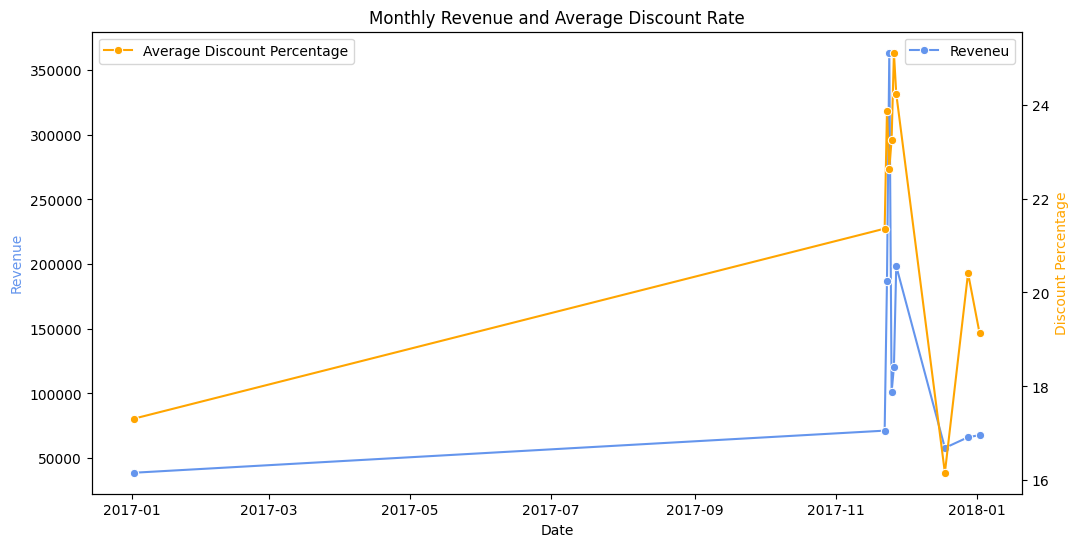

In [82]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first line for 'reveneu'
sns.lineplot(x='date', y='reveneu', data=plot_data, marker='o', color='cornflowerblue', label='Reveneu', ax=ax1)

# Creating a second y-axis to plot 'discount_percentage'
ax2 = ax1.twinx()
sns.lineplot(x='date', y='discount_percentage', data=plot_data, marker='o', color='orange', label='Average Discount Percentage', ax=ax2)

# Setting labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color='cornflowerblue')
ax2.set_ylabel('Discount Percentage', color='orange')
plt.title('Monthly Revenue and Average Discount Rate')


# Display the plot
plt.show()


## By Product

In [83]:
plot_Product = (total_df
      .groupby('sku')
      .agg({ 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      #.nlargest( 10, 'product_quantity')
      #.sort_values('product_quantity', ascending=False)
)
plot_Product = plot_Product.reset_index()
plot_Product

,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
0,8MO0001-A,1.00,12.96,62.97,12.96,High_Discount
1,8MO0003-A,1.00,12.85,63.29,12.85,High_Discount
2,8MO0007,7.00,22.28,36.36,155.93,High_Discount
3,8MO0008,11.00,21.59,38.31,235.89,High_Discount
4,8MO0009,5.00,17.47,50.07,87.37,High_Discount
...,...,...,...,...,...,...
5093,ZAG0040,1.00,26.99,32.51,26.99,High_Discount
5094,ZAG0041,1.00,19.99,33.34,19.99,High_Discount
5095,ZAG0042,1.00,19.99,33.34,19.99,High_Discount
5096,ZEP0007,1.00,125.99,16.00,125.99,Medium_Discount


Delete negative discound

In [84]:
# Step 1: Create a boolean Series to identify rows with negative discount percentages
plot_Product.cl = plot_Product['discount_percentage'] < 0
# Step 2: Filter the DataFrame using the boolean Series
plot_Product_category2 = plot_Product.loc[~plot_Product.cl, :]


## Simple percentage calculation of percentatge discounted

In [86]:
total_sku_products=plot_Product_category2['sku'].nunique()

In [87]:
plot_Product_category2["reveneu"].sum()

7456154.0200000005

In [88]:
no_discounted_sku_products=plot_Product_category2.loc[plot_Product_category2["discount_percentage"]==0,:]
no_discounted_sku_products
no_discounted_sku_products['sku'].nunique()

116

In [89]:
no_discounted_sku_products["reveneu"].sum()

21830.379999999994

In total are 4975 products / no discouted products are 116

In [90]:
# Simple percentage calculation
total_products = 4975
products_not_discounted = 116

percentage_not_discounted = (products_not_discounted / total_products) * 100

print(f"Percentage of products not discounted: {percentage_not_discounted:.2f}%")


Percentage of products not discounted: 2.33%


In [91]:
# Simple percentage calculation
total_products_reveneu = 7456154.0200000005
products_not_discounted_reveneu = 21830.379999999994

percentage_not_discounted = (products_not_discounted_reveneu / total_products_reveneu) * 100

print(f"Percentage of reveneu of the products not discounted: {percentage_not_discounted:.2f}%")


Percentage of reveneu of the products not discounted: 0.29%


In [92]:
no_discounted_sku_products

,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
13,ADN0028,4.00,19.99,0.00,79.96,no_Discount
14,ADN0029,3.00,19.99,0.00,59.97,no_Discount
15,ADN0031,2.00,19.99,0.00,39.98,no_Discount
309,APP0234,2.00,35.00,0.00,70.00,no_Discount
404,APP1097,1.00,179.00,0.00,179.00,no_Discount
408,APP1103,1.00,55.00,0.00,55.00,no_Discount
409,APP1104,1.00,55.00,0.00,55.00,no_Discount
411,APP1106,2.00,55.00,0.00,110.00,no_Discount
450,APP1193,2.00,45.00,0.00,90.00,no_Discount
458,APP1213,1.00,15.00,0.00,15.00,no_Discount


products with higher quantities sold also attract higher discounts.

<Figure size 1200x800 with 0 Axes>

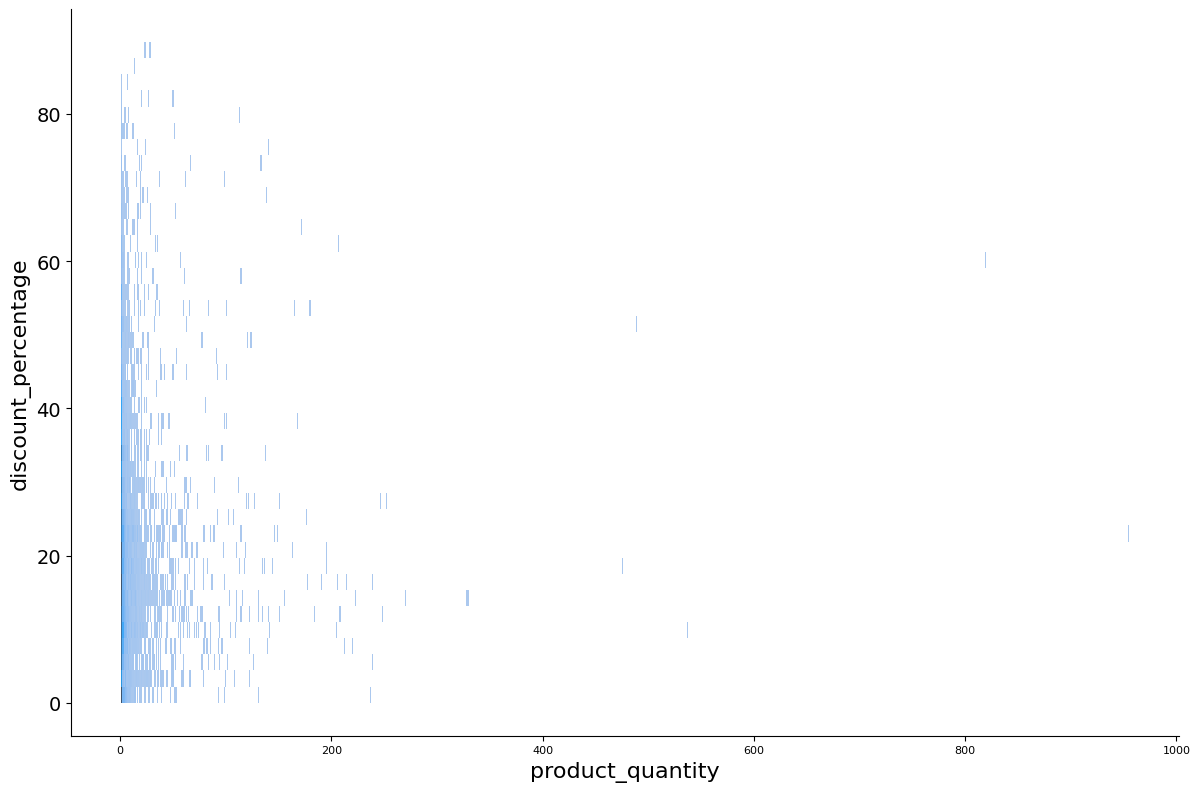

In [94]:
custom_palette = {
    'High_Discount': 'red',
    'Medium_Discount': 'green',
    'Low_Discount': 'blue',
    'no_Discount': 'black'
}

# Assuming 'sku' is on the x-axis and 'discount_percentage' on the y-axis
plt.figure(figsize=(12, 8))
sns.displot(kind='hist', x='product_quantity', y='discount_percentage', data=plot_Product_category2, height=8, aspect=1.5)
# sns.catplot(kind='bar', x='unit_price', y='Product_category', data=plot_Product_category, hue='Categories_discounVasil', palette=custom_palette)#, hue='Categories_discounVasil', palette=custom_palette) #, s=400)

# Set plot labels and title
plt.xlabel('product_quantity', fontsize=16)
plt.ylabel('discount_percentage', fontsize=16)

# Set the font size for the axis labels
plt.xticks(fontsize=8)  # Adjust the font size as needed
plt.yticks(fontsize=14)  # Adjust the font size as needed
# Remove grid
plt.grid(False)

# # Place the legend outside the graphic and make it bigger
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10}, markerscale=3)

# Show the plot
plt.show()

## By Product category

In [95]:
plot_Product_category = (total_df
      .groupby('Product_category')
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'product_quantity')
      #.sort_values('product_quantity', ascending=False)
)
plot_Product_category

,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
Product_category,,,,,,
other,17921,19892.00,97.31,22.80,1851223.68,Medium_Discount
memory,14274,17089.00,149.60,16.77,2435941.48,Medium_Discount
cases,4946,5251.00,27.31,34.38,144134.07,Medium_Discount
iphone,3465,3616.00,335.86,11.28,1202821.54,no_Discount
apple_divers,2702,3286.00,62.68,26.18,180274.31,Medium_Discount
monitor,2639,3073.00,248.49,20.51,743081.79,Medium_Discount
"apple_generica, generica",2122,2281.00,129.34,23.23,283641.08,Medium_Discount
keyboard,1277,1424.00,71.67,24.81,102846.37,Low_Discount
tablet,878,922.00,416.51,9.42,380264.13,no_Discount


<Figure size 1200x800 with 0 Axes>

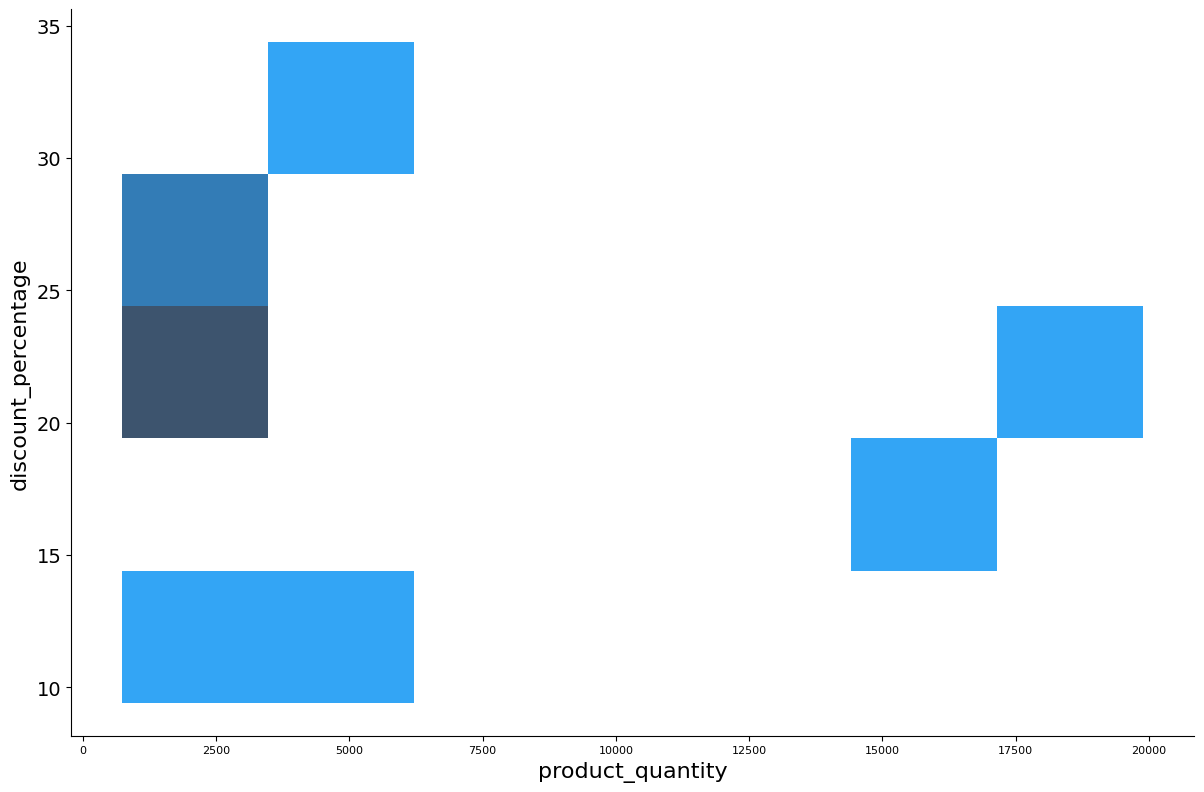

In [96]:
custom_palette = {
    'High_Discount': 'red',
    'Medium_Discount': 'green',
    'Low_Discount': 'blue',
    'no_Discount': 'black'
}

# Assuming 'sku' is on the x-axis and 'discount_percentage' on the y-axis
plt.figure(figsize=(12, 8))
sns.displot(kind='hist', x='product_quantity', y='discount_percentage', data=plot_Product_category, height=8, aspect=1.5)
# sns.catplot(kind='bar', x='unit_price', y='Product_category', data=plot_Product_category, hue='Categories_discounVasil', palette=custom_palette)#, hue='Categories_discounVasil', palette=custom_palette) #, s=400)

# Set plot labels and title
plt.xlabel('product_quantity', fontsize=16)
plt.ylabel('discount_percentage', fontsize=16)

# Set the font size for the axis labels
plt.xticks(fontsize=8)  # Adjust the font size as needed
plt.yticks(fontsize=14)  # Adjust the font size as needed
# Remove grid
plt.grid(False)

# # Place the legend outside the graphic and make it bigger
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10}, markerscale=3)

# Show the plot
plt.show()

## What is the distribution of product prices acros diferent categories?

In [97]:
plot_Product_category=plot_Product_category.reset_index()

## Add title for axis and table

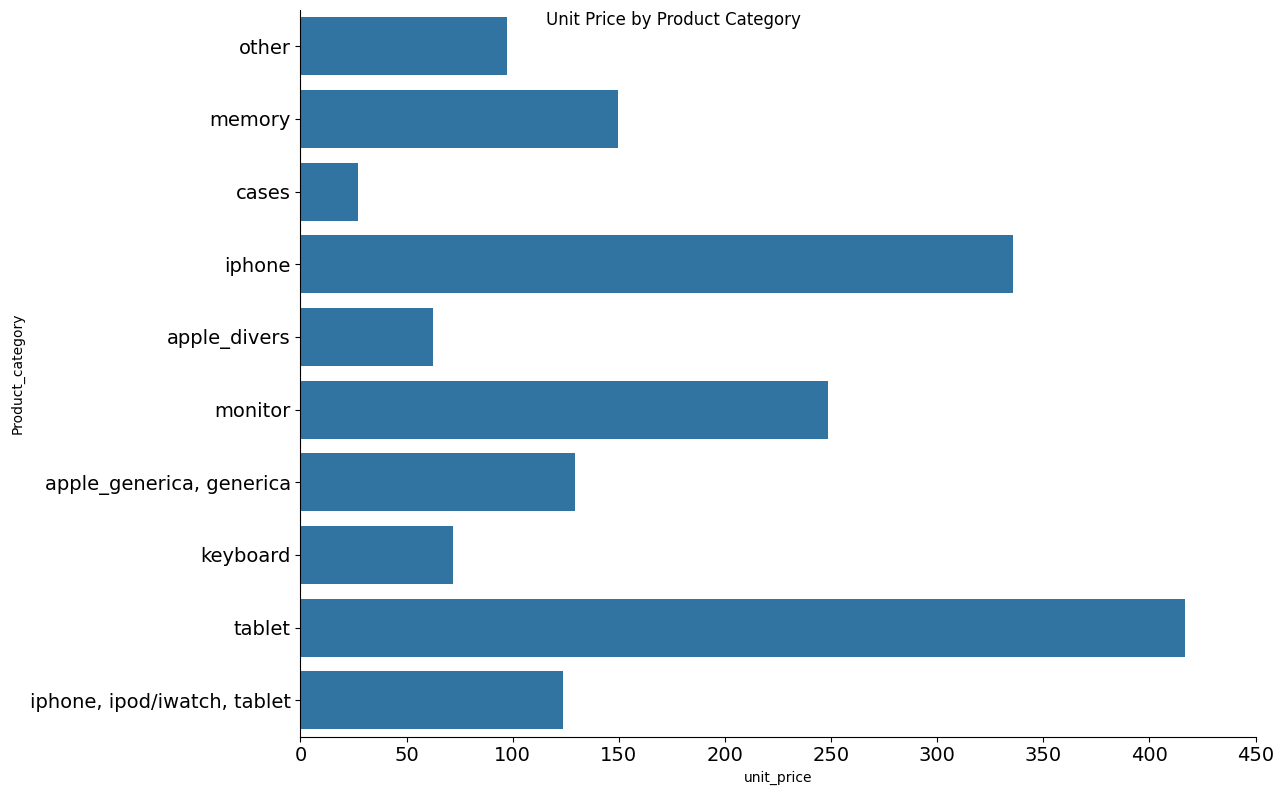

In [99]:
# Correct the axis according to your description and include the custom palette
g = sns.catplot(kind='bar', x='unit_price', y='Product_category', data=plot_Product_category, height=8, aspect=1.5)

# Set titles and labels if necessary
g.set_axis_labels("unit_price", "Product_category")
g.set_xticklabels(size=14)  # X-axis tick labels
g.set_yticklabels(size=14)
g.fig.suptitle('Unit Price by Product Category')  # Add the tittle here

plt.show()


In [101]:
plot_dis2= plot_Product_category.reset_index()
plot_dis2.columns

Index(['index', 'Product_category', 'sku', 'product_quantity', 'unit_price',
       'discount_percentage', 'reveneu', 'Categories_discounVasil'],
      dtype='object')

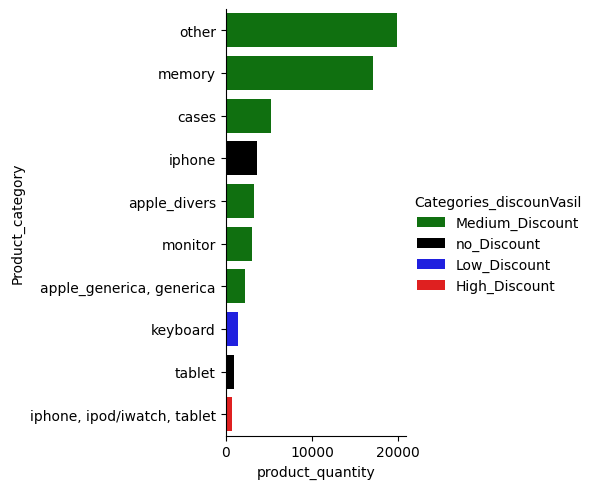

In [102]:
custom_palette = {
    'High_Discount': 'red',
    'Medium_Discount': 'green',
    'Low_Discount': 'blue',
    'no_Discount': 'black'
}

sns.catplot(x='product_quantity', y='Product_category', data=plot_dis2, hue='Categories_discounVasil', kind="bar", palette=custom_palette)

delete discounted prices negatives

In [103]:
# Step 1: Create a boolean Series to identify rows with negative discount percentages
deletenegativetotalvalues = total_df['discount_percentage'] < 0
# Step 2: Filter the DataFrame using the boolean Series
total_df = total_df.loc[~deletenegativetotalvalues, :]
total_df.sample(2)

,id,id_order,product_quantity,sku,unit_price,date,year,month,day_of_week,name,...,price,type,discount,discount_percentage,Categories_discounVasil,reveneu,sku_prefix,Product_category,short,long
19710,1316653,388810,1.00,LOG0191,99.99,2017-08-11 18:53:11,2017,8,Friday,Ultimate Ears Boom 2 Bluetooth Portable Speake...,...,209.00,5398,109.01,52.16,High_Discount,99.99,LOG,other,LOG,Logitech
14065,1274766,368924,1.00,AP20178,749.00,2017-06-25 23:59:35,2017,6,Sunday,Like new - Apple iPhone 7 128GB Black Bright,...,749.00,85641716,0.00,0.00,no_Discount,749.00,AP2,"apple_generica, generica",AP2,Apple


In [105]:
plot_Product_category3 = (total_df
    .groupby('Product_category')
    .agg({
        'sku': 'count',
        'product_quantity': 'sum',
        'unit_price': 'mean',
        'discount_percentage': 'mean',
        'reveneu': 'sum',
        'Categories_discounVasil': 'first'
    })
    .sort_values('product_quantity', ascending=False)  # Corrected placement
)
plot_Product_category3=plot_Product_category3.reset_index()

In [ ]:
plot_Product_category3

,Product_category,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
0,other,17921,19892.00,97.31,22.80,1851223.68,Medium_Discount
1,memory,14274,17089.00,149.60,16.77,2435941.48,Medium_Discount
2,cases,4946,5251.00,27.31,34.38,144134.07,Medium_Discount
3,iphone,3465,3616.00,335.86,11.28,1202821.54,no_Discount
4,apple_divers,2702,3286.00,62.68,26.18,180274.31,Medium_Discount
5,monitor,2639,3073.00,248.49,20.51,743081.79,Medium_Discount
6,"apple_generica, generica",2122,2281.00,129.34,23.23,283641.08,Medium_Discount
7,keyboard,1277,1424.00,71.67,24.81,102846.37,Low_Discount
8,tablet,878,922.00,416.51,9.42,380264.13,no_Discount
9,"iphone, ipod/iwatch, tablet",686,738.00,123.61,19.86,89225.85,High_Discount


## % discounted for the different categories

<Figure size 1200x800 with 0 Axes>

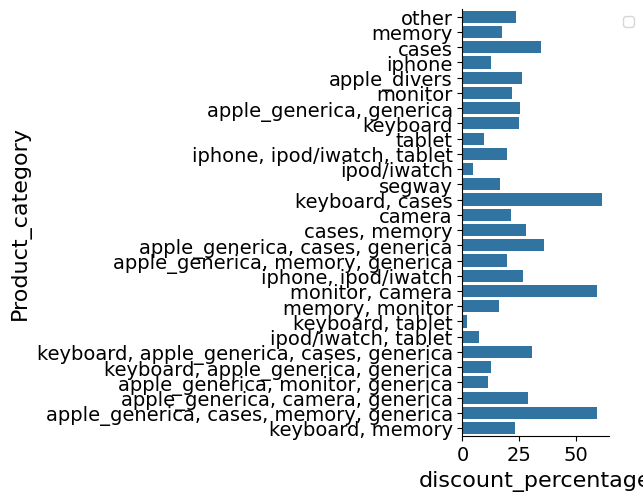

In [106]:
# custom_palette = {
#     'High_Discount': 'red',
#     'Medium_Discount': 'green',
#     'Low_Discount': 'blue',
#     'no_Discount': 'black'
# }

# Assuming 'sku' is on the x-axis and 'discount_percentage' on the y-axis
plt.figure(figsize=(12, 8))
sns.catplot(x='discount_percentage', y='Product_category', data=plot_Product_category3, kind= "bar")

# Set plot labels and title
plt.xlabel('discount_percentage', fontsize=16)
plt.ylabel('Product_category', fontsize=16)

# Set the font size for the axis labels
plt.xticks(fontsize=14)  # Adjust the font size as needed
plt.yticks(fontsize=14)  # Adjust the font size as needed
# Remove grid
plt.grid(False)

# Place the legend outside the graphic and make it bigger
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10}, markerscale=3)

# Show the plot
plt.show()

## Cheap items hae higher discount

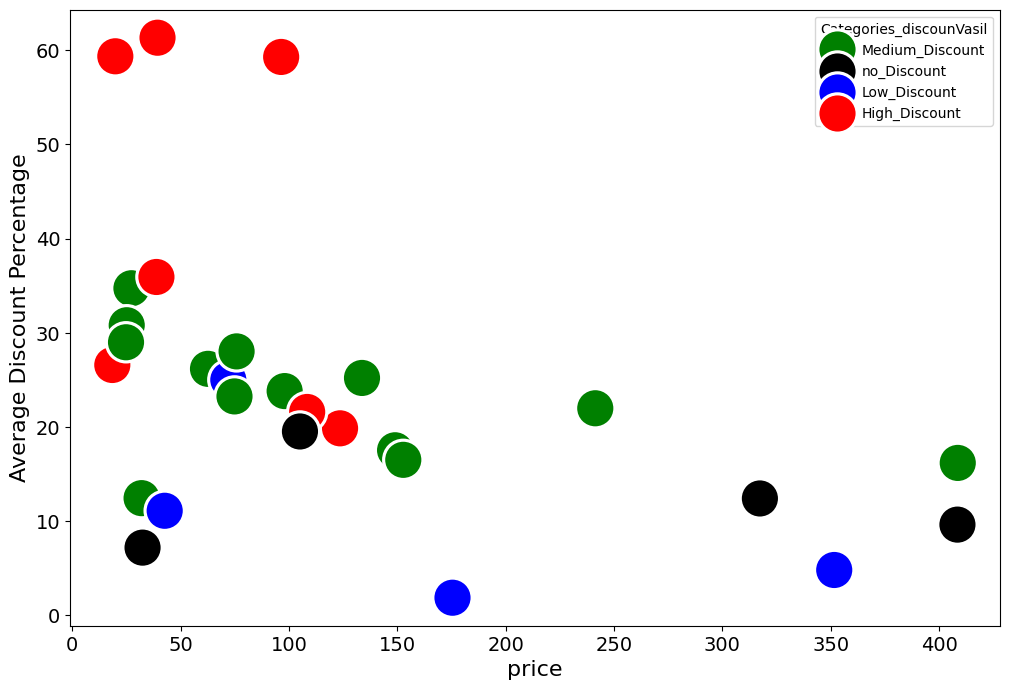

In [107]:
custom_palette = {
    'High_Discount': 'red',
    'Medium_Discount': 'green',
    'Low_Discount': 'blue',
    'no_Discount': 'black'
}


# Assuming 'sku' is on the x-axis and 'discount_percentage' on the y-axis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='unit_price', y='discount_percentage', data=plot_Product_category3, hue='Categories_discounVasil', s=800, palette=custom_palette)

# Set plot labels and title
plt.xlabel('price', fontsize=16)
plt.ylabel('Average Discount Percentage', fontsize=16)

# Set the font size for the axis labels
plt.xticks(fontsize=14)  # Adjust the font size as needed
plt.yticks(fontsize=14)  # Adjust the font size as needed
# Remove grid
plt.grid(False)

# # Place the legend outside the graphic and make it bigger
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10}, markerscale=3)

# Show the plot
plt.show()

<Axes: xlabel='reveneu', ylabel='discount_percentage'>

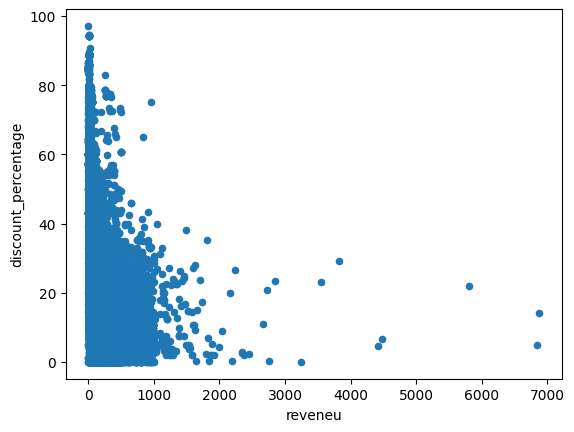

In [108]:
# find goruped_order: most sold, highest revenue -> highest average discount_price
total_category_group = total_df.groupby('id_order').agg({'product_quantity': 'sum', 'reveneu': 'mean', 'discount_percentage':'mean'}).sort_values('product_quantity', ascending=False)
total_category_group
total_category_group.plot.scatter(x='reveneu', y='discount_percentage')

## Xmas

## Delete negative values in discount percentatge

In [109]:
# Step 1: Create a boolean Series to identify rows with negative discount percentages
deletenegativexmasvalues = Xmas_df['discount_percentage'] < 0
# Step 2: Filter the DataFrame using the boolean Series
Xmas_df = Xmas_df.loc[~deletenegativexmasvalues, :]
Xmas_df.sample(2)

,id,id_order,product_quantity,sku,unit_price,date,year,month,day_of_week,name,...,price,type,discount,discount_percentage,Categories_discounVasil,reveneu,sku_prefix,Product_category,short,long
11542,1461905,449852,1.00,OWC0013,2.54,2017-11-27 23:10:42,2017,11,Monday,OWC Kit of 5 tools for Mac and PC,...,6.99,14305406,4.45,63.66,High_Discount,2.54,OWC,other,OWC,OWC
8360,1438443,439628,1.00,SAT0013,25.49,2017-11-24 15:33:24,2017,11,Friday,Satechi Support Macbook Aluminum Gray Space,...,39.99,8696,14.50,36.26,High_Discount,25.49,SAT,other,SAT,Satechi


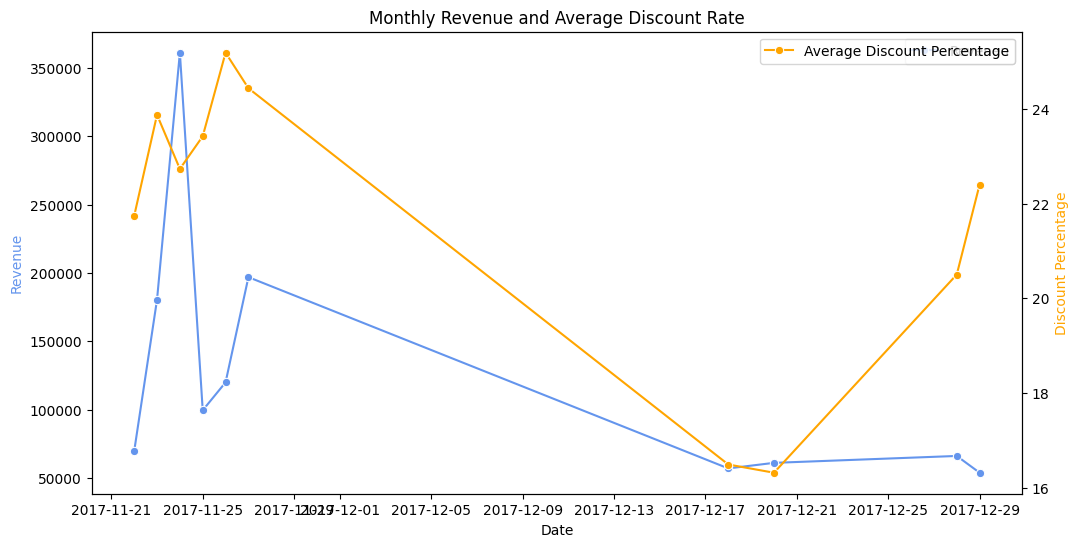

In [111]:
# ----------Plot data by date--------------------------------------------------------------

plot_data_xmas = (Xmas_df
      .resample('D', on='date')
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'product_quantity' )
)
plot_data_xmas

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first line for 'reveneu'
sns.lineplot(x='date', y='reveneu', data=plot_data_xmas, marker='o', color='cornflowerblue', label='Reveneu', ax=ax1)

# Creating a second y-axis to plot 'discount_percentage'
ax2 = ax1.twinx()
sns.lineplot(x='date', y='discount_percentage', data=plot_data_xmas, marker='o', color='orange', label='Average Discount Percentage', ax=ax2)

# Setting labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color='cornflowerblue')
ax2.set_ylabel('Discount Percentage', color='orange')
plt.title('Monthly Revenue and Average Discount Rate')


# Display the plot
plt.show()

# ------------------------------------------------------------------------

# plot_Product_category_xmas = (Xmas_df
#       .groupby('Product_category')
#       .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
#       .sort_values('product_quantity', ascending=False)
# )
# plot_Product_category_xmas

## Summer

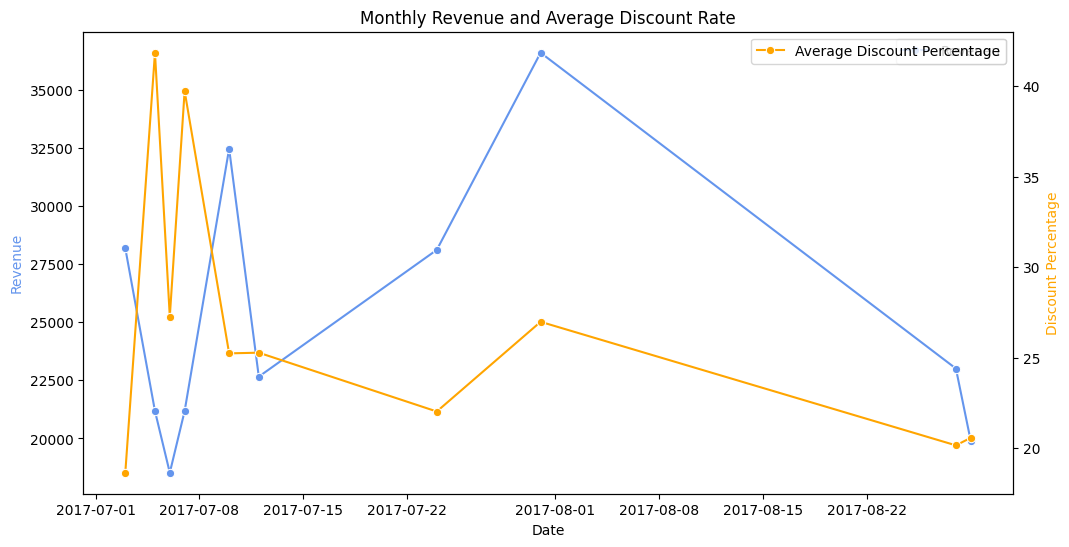

In [112]:
# plot_company_summer = (summer_df
#       .groupby('long')
#       .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
#       .nlargest( 10, 'product_quantity' )
# )
# plot_company_summer

plot_data_summer = (summer_df
      .resample('D', on='date')
      .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
      .nlargest( 10, 'product_quantity' )
)
plot_data_summer


# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first line for 'reveneu'
sns.lineplot(x='date', y='reveneu', data=plot_data_summer, marker='o', color='cornflowerblue', label='Reveneu', ax=ax1)

# Creating a second y-axis to plot 'discount_percentage'
ax2 = ax1.twinx()
sns.lineplot(x='date', y='discount_percentage', data=plot_data_summer, marker='o', color='orange', label='Average Discount Percentage', ax=ax2)

# Setting labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color='cornflowerblue')
ax2.set_ylabel('Discount Percentage', color='orange')
plt.title('Monthly Revenue and Average Discount Rate')


# Display the plot
plt.show()



# plot_Product_category_summer = (summer_df
#       .groupby('Product_category')
#       .agg({'sku': 'count', 'product_quantity': 'sum', 'unit_price': 'mean', 'discount_percentage':'mean', 'reveneu':'sum', 'Categories_discounVasil': "first"})
#       .sort_values('product_quantity', ascending=False)
# )
# plot_Product_category_summer

<Axes: xlabel='discount_percentage', ylabel='reveneu'>

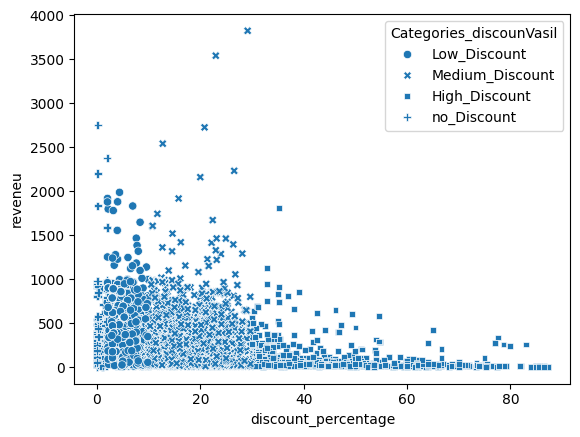

In [114]:
#scatter plot to explore the relationship between the recommended price for a product (products.price) and the price that products actually sold for (orderlines.unit_price)
sns.scatterplot(data=Xmas_df, x="discount_percentage", y="reveneu", legend='auto',style="Categories_discounVasil")

<Axes: xlabel='price', ylabel='unit_price'>

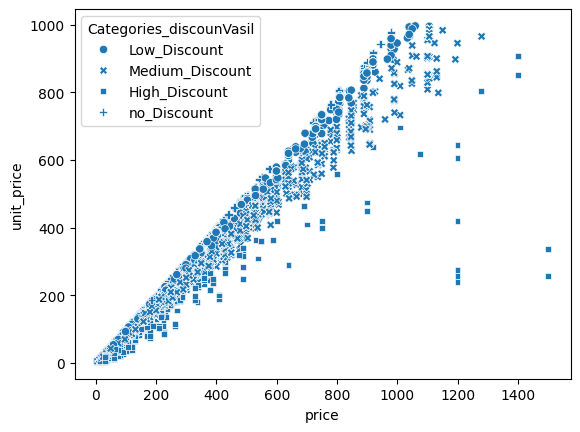

In [115]:
#scatter plot to explore the relationship between the recommended price for a product (products.price) and the price that products actually sold for (orderlines.unit_price)
sns.scatterplot(data=Xmas_df, x="price", y="unit_price", legend='auto',style="Categories_discounVasil")

<Axes: xlabel='price', ylabel='unit_price'>

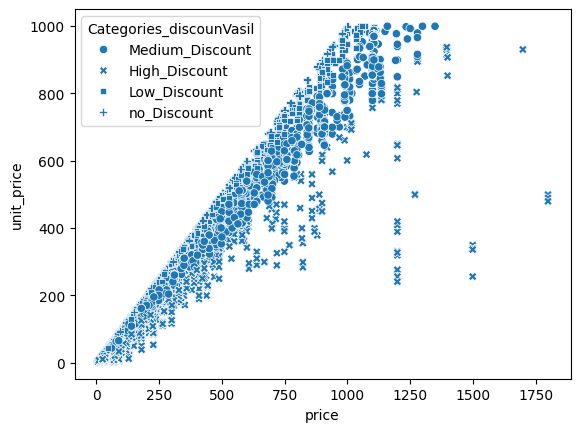

In [116]:
total_df
#scatter plot to explore the relationship between the recommended price for a product (products.price) and the price that products actually sold for (orderlines.unit_price)
sns.scatterplot(data=total_df, x="price", y="unit_price", legend='auto', style="Categories_discounVasil" )

## When customers like to spend more money.Display the average daily price of an order on a line plot.

In [117]:
top_10_brands_list = (
                      list(
                          total_df
                          .groupby("long", as_index=False)
                          ["unit_price"]
                          .sum()
                          .nlargest(10, "unit_price")
                          ["long"]
                          )
                      )

In [118]:
top_10_brands_list

['Apple',
 'Pack',
 'OWC',
 'LaCie',
 'LG',
 'Western Digital',
 'Wacom',
 'Crucial',
 'Dell',
 'Synology']

In [119]:
total_df["date"] = pd.to_datetime(total_df["date"])

In [120]:
total_df["date"] = total_df["date"].dt.date

In [121]:
daily_totals_df = (
                  total_df
                  .loc[total_df["long"].isin(top_10_brands_list), :]
                  .groupby(["date", "long"], as_index=False)
                  .agg({
        'sku': 'count',
        'product_quantity': 'sum',
        'unit_price': 'mean',
        'discount_percentage': 'mean',
        'reveneu': 'sum',
        'Categories_discounVasil': 'first'
    })
    .sort_values('product_quantity', ascending=False)
                  )


In [122]:
daily_totals_df

,date,long,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
2330,2017-11-24,Apple,471,531.00,261.92,16.98,124994.38,Low_Discount
2320,2017-11-23,Apple,275,288.00,252.59,18.33,71251.07,Medium_Discount
2360,2017-11-27,Apple,181,194.00,314.28,15.30,58833.81,Medium_Discount
2350,2017-11-26,Apple,145,155.00,219.98,20.25,32216.27,Medium_Discount
2310,2017-11-22,Apple,141,152.00,198.30,20.84,29312.88,Medium_Discount
...,...,...,...,...,...,...,...,...
2758,2018-01-09,Crucial,1,1.00,162.99,0.60,162.99,no_Discount
1212,2017-07-06,Synology,1,1.00,433.99,0.23,433.99,no_Discount
2760,2018-01-09,LG,1,1.00,224.00,6.28,224.00,Low_Discount
1199,2017-07-05,Crucial,1,1.00,128.99,19.37,128.99,Medium_Discount


In [123]:
daily_totals_df.rename(columns={"long": "Company"}, inplace=True)

In [124]:
daily_totals_df

,date,Company,sku,product_quantity,unit_price,discount_percentage,reveneu,Categories_discounVasil
2330,2017-11-24,Apple,471,531.00,261.92,16.98,124994.38,Low_Discount
2320,2017-11-23,Apple,275,288.00,252.59,18.33,71251.07,Medium_Discount
2360,2017-11-27,Apple,181,194.00,314.28,15.30,58833.81,Medium_Discount
2350,2017-11-26,Apple,145,155.00,219.98,20.25,32216.27,Medium_Discount
2310,2017-11-22,Apple,141,152.00,198.30,20.84,29312.88,Medium_Discount
...,...,...,...,...,...,...,...,...
2758,2018-01-09,Crucial,1,1.00,162.99,0.60,162.99,no_Discount
1212,2017-07-06,Synology,1,1.00,433.99,0.23,433.99,no_Discount
2760,2018-01-09,LG,1,1.00,224.00,6.28,224.00,Low_Discount
1199,2017-07-05,Crucial,1,1.00,128.99,19.37,128.99,Medium_Discount


## Graph Daily income

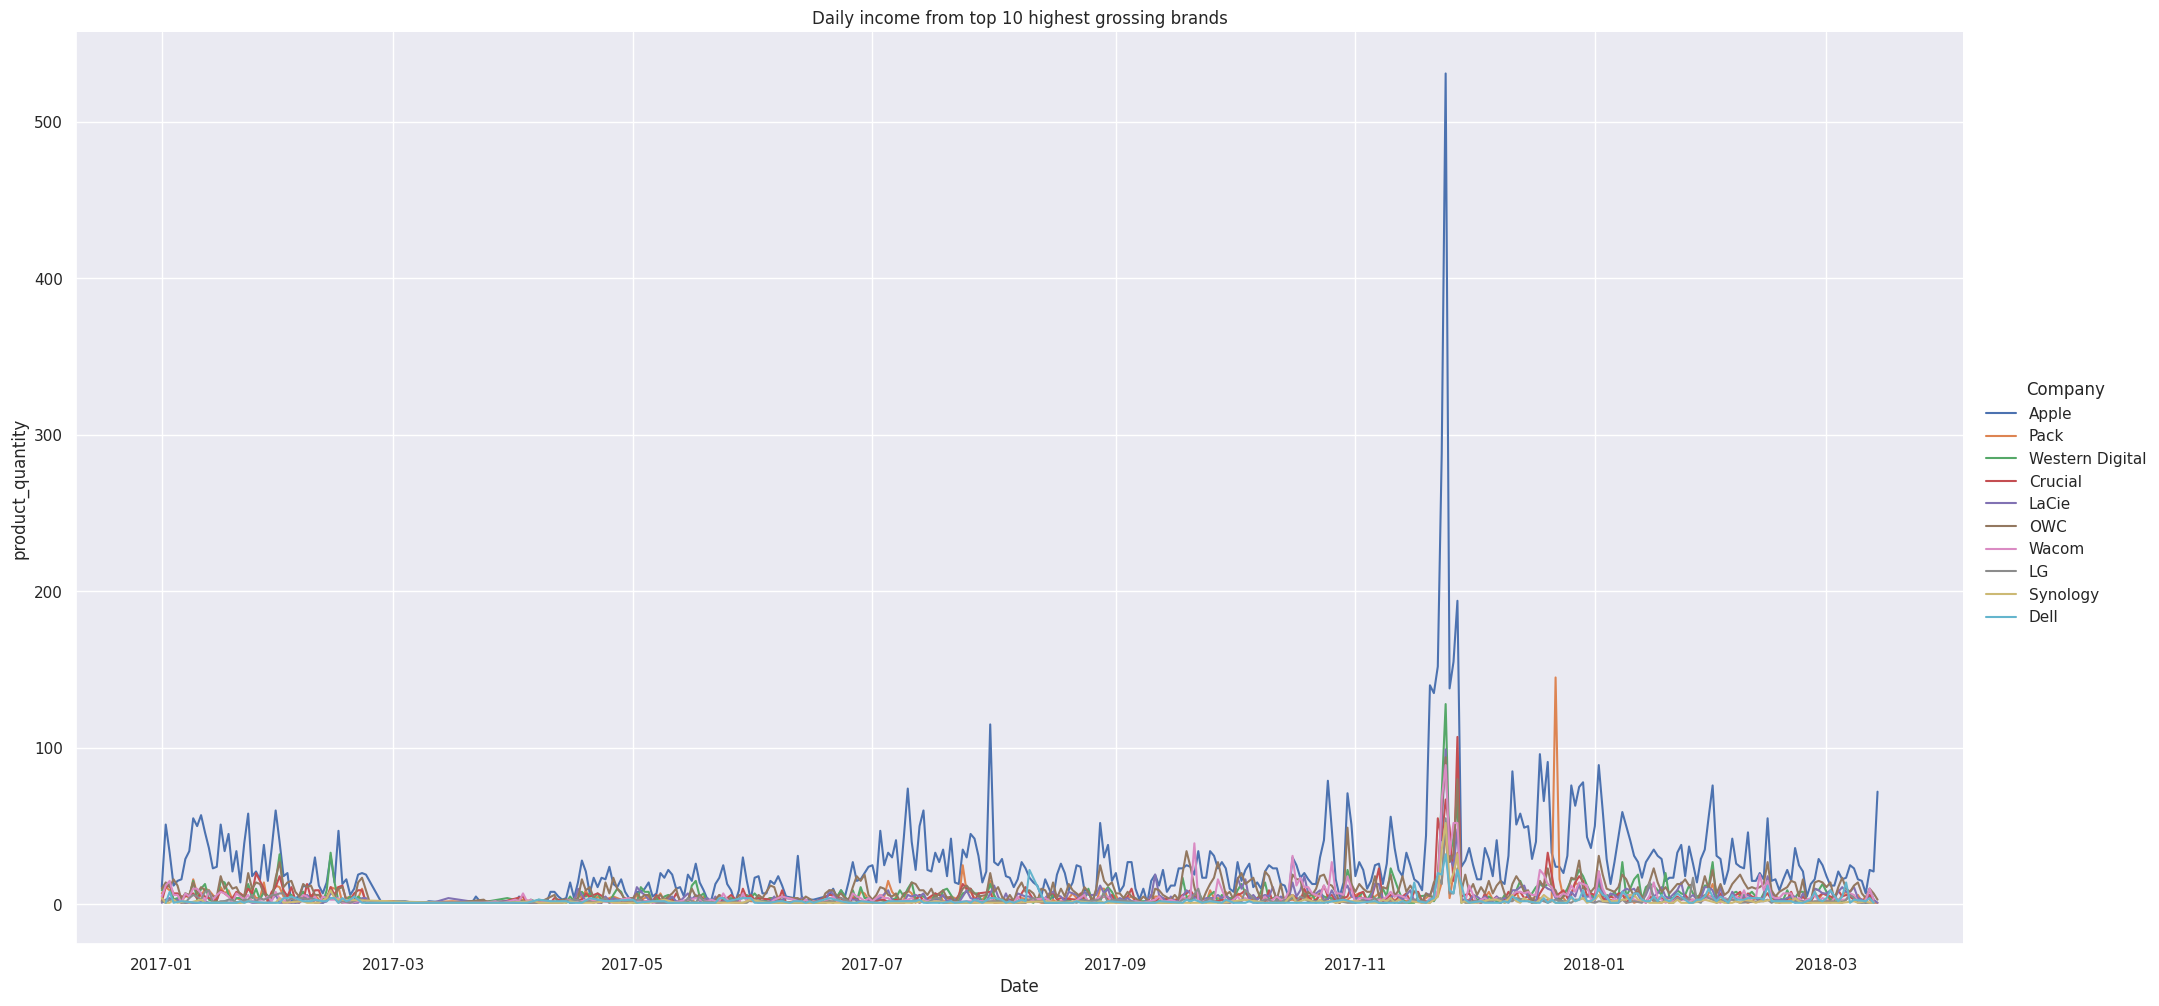

In [125]:
sns.set_theme(style="darkgrid")

(
sns.relplot(data = daily_totals_df,
            x="date",
            y="product_quantity",
            hue="Company",
            kind="line",
            height= 10,
            aspect=2)
    .set_axis_labels("Date",
                     "product_quantity")
    .set(title="Daily income from top 10 highest grossing brands")
);

In [126]:
plot_Product_category3 = (total_df
    .groupby('Product_category')
    .agg({
        'sku': 'count',
        'product_quantity': 'sum',
        'unit_price': 'mean',
        'discount_percentage': 'mean',
        'reveneu': 'sum',
        'Categories_discounVasil': 'first'
    })
    .sort_values('product_quantity', ascending=False)  # Corrected placement
)
plot_Product_category3=plot_Product_category3.reset_index()